This is a new notebook since the old one is getting super slow. Cells to always run:

In [5]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from astropy.io import fits
from ast import literal_eval
import numpy as np
import math as m
import os
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from math import log10

def m(f):
    """
    calculate the apparent/instrumental magnitude through a given filter.
    
    :param f: the flux through that particular filter.
    """
    return round(-2.5*log10(f),2)


def bv(flux_b, flux_v, zp_blue, zp_visual):
    """
    calculate and return a magnitude difference, i.e. the B-V index, for two images
    
    :param flux_b: flux through the bluer filter
    :param flux_v: flux through the visual filter
    """

    m_blue = -2.5 * log10(flux_b) + zp_blue
    m_visual = -2.5 * log10(flux_v) + zp_visual
    return round(m_blue - m_visual, 2)

# 18 April 2017

3:00 pm

Continuing on from yesterday, trying to fix the calculation of ratios for the moon set from April 10.

Ok fixed it. So, if I get the error 'img_metadata referenced before assignment', the likely culprit is that the photometry file is just accidentally empty, so `do_photometry()` just needs to be rerun.

3:30 pm


In [63]:
# Open the dataframe for reading
dffile = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/10April2017_MOON/set1/FR_B-V_82a-11.csv'
B_V_df = pd.read_csv(dffile)

good = B_V_df.loc[B_V_df['B-V'] != -9999]
print(good['B-V'][:10])

print('MAXIMUM B-V VALUE')
print(good.max(numeric_only=True))
print('MINIMUM B-V VALUE')
print(good.min(numeric_only=True))

IOError: File /home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/10April2017_MOON/set1/FR_B-V_82a-11.csv does not exist

In [ ]:
# Get FITS data and save for using in matplotlib ===========================
default = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera'
dir_extN = '10April2017_MOON/set1/0.7millisec/None'
imgN = '22-33-48-946.FIT'
pathN = '/'.join([default, dir_extN, imgN])
img_fileN = pathN if pathN[-4:] == '.FIT' else pathN + '.FIT'
hdu_list = fits.open(img_fileN)
hdu_list.info()
image_data = hdu_list[0].data
hdu_list.close()

In [ ]:
%%capture 
cutoffs = [-3, -2, -1, 0, 1, 2, 3]
filters = '82a and 11'

for i in range(len(cutoffs) -1):
    # create plot with image as background
    fig1 = plt.figure(figsize=(16, 12))
    ax1 = fig1.add_subplot(111)
    plt.imshow(image_data, cmap='gray')
    ax1.set_autoscale_on(False)

    # iterate over the rows
    p = 0
    pt = []
    for index, row in good.iterrows():
        if cutoffs[i] < row['B-V'] < cutoffs[i+1]:
            # collect the vertices for the boxes
            r1 = literal_eval(row['v1'])
            r2 = literal_eval(row['v2'])
            r3 = literal_eval(row['v3'])
            r4 = literal_eval(row['v4'])

            # including the 1st point at the end again allows the boxes to be closed
            x = np.array([r1[0], r2[0], r3[0], r4[0], r1[0]])
            y = np.array([r1[1], r2[1], r3[1], r4[1], r1[1]])

             # ax.scatter(x, y, c='lime') # toggle to turn on plotting vertices
            color = np.random.rand(3,1)
            ax1.plot(x, y, c=color, label=p)
            pt.append([p, row['B-V'], [r1, r2, r3, r4], color])
            p += 1

    ax1.set_title('B-V values between {} and {} for filters {}'.format(cutoffs[i], cutoffs[i+1], filters), fontsize=20)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    #plt.legend()
    plt.show()

3:47 pm

Hmm, this isn't really helpful...  in this case it looks like most of the moon has a B-V value between 0 and 1, but part of it is below 0. Below 0 means bluer, above means redder. This is in opposition to what I got in the other moon set. Is maybe the moon not a good candidate for calculating flux ratio? Maybe there's not a large enough area? Maybe I do need to take short-length exposures of the sun as Greg suggested.

It's unfortunately not sunny right now but it was earlier, so it may come back out. In the meantime maybe I can look at flux ratios of some clouds to see what those look like in general.

## B-V plots for 3 January, set 1, 82a to 11

In [ ]:
# Open the dataframe for reading
dffile = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/3January2017/set1/FR_B-V_82a-11.csv'
B_V_df = pd.read_csv(dffile)

good = B_V_df.loc[B_V_df['B-V'] != -9999]
print(good['B-V'][:10])

print('MAXIMUM B-V VALUE')
print(good.max(numeric_only=True))
print('MINIMUM B-V VALUE')
print(good.min(numeric_only=True))

In [ ]:
# Get FITS data and save for using in matplotlib ===========================
default = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera'
dir_extN = '3January2017/set1/none/200microsec'
imgN = '21-6-57-919.FIT'
pathN = '/'.join([default, dir_extN, imgN])
img_fileN = pathN if pathN[-4:] == '.FIT' else pathN + '.FIT'
hdu_list = fits.open(img_fileN)
hdu_list.info()
image_data = hdu_list[0].data
hdu_list.close()

cutoffs = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
filters = '82a and 11'

for i in range(len(cutoffs) -1):
    # create plot with image as background
    fig1 = plt.figure(figsize=(16, 12))
    ax1 = fig1.add_subplot(111)
    plt.imshow(image_data, cmap='gray')
    ax1.set_autoscale_on(False)

    # iterate over the rows
    p = 0
    pt = []
    color = np.random.rand(3,1)
    for index, row in good.iterrows():
        if cutoffs[i] < row['B-V'] < cutoffs[i+1]:
            # collect the vertices for the boxes
            r1 = literal_eval(row['v1'])
            r2 = literal_eval(row['v2'])
            r3 = literal_eval(row['v3'])
            r4 = literal_eval(row['v4'])

            # including the 1st point at the end again allows the boxes to be closed
            x = np.array([r1[0], r2[0], r3[0], r4[0], r1[0]])
            y = np.array([r1[1], r2[1], r3[1], r4[1], r1[1]])

             # ax.scatter(x, y, c='lime') # toggle to turn on plotting vertices
            ax1.plot(x, y, c=color, label=p)
            pt.append([p, row['B-V'], [r1, r2, r3, r4], color])
            p += 1

    ax1.set_title('B-V values between {} and {} for filters {}, 3 Jan'.format(cutoffs[i], cutoffs[i+1], filters), fontsize=20)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    #plt.legend()
    plt.show()

Interesting--there's a result where it's between 0 and 1 for the bulk of the cloud.

## B-V plots for 3 January, set 2, 82a to 11

In [ ]:
# Open the dataframe for reading
dffile = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/3January2017/set2/FR_B-V_82a-11.csv'
B_V_df = pd.read_csv(dffile)

good = B_V_df.loc[B_V_df['B-V'] != -9999]
print(good['B-V'][:10])

print('MAXIMUM B-V VALUE')
print(good.max(numeric_only=True))
print('MINIMUM B-V VALUE')
print(good.min(numeric_only=True))

In [ ]:
%%capture 
# Get FITS data and save for using in matplotlib ===========================
default = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera'
dir_extN = '3January2017/set2/none/250microsec'
imgN = '21-17-21-228.FIT'
pathN = '/'.join([default, dir_extN, imgN])
img_fileN = pathN if pathN[-4:] == '.FIT' else pathN + '.FIT'
hdu_list = fits.open(img_fileN)
hdu_list.info()
image_data = hdu_list[0].data
hdu_list.close()

cutoffs = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]
filters = '82a and 11'

for i in range(len(cutoffs) -1):
    # create plot with image as background
    fig1 = plt.figure(figsize=(16, 12))
    ax1 = fig1.add_subplot(111)
    plt.imshow(image_data, cmap='gray')
    ax1.set_autoscale_on(False)

    # iterate over the rows
    p = 0
    pt = []
    color = np.random.rand(3,1)
    for index, row in good.iterrows():
        if cutoffs[i] < row['B-V'] < cutoffs[i+1]:
            # collect the vertices for the boxes
            r1 = literal_eval(row['v1'])
            r2 = literal_eval(row['v2'])
            r3 = literal_eval(row['v3'])
            r4 = literal_eval(row['v4'])

            # including the 1st point at the end again allows the boxes to be closed
            x = np.array([r1[0], r2[0], r3[0], r4[0], r1[0]])
            y = np.array([r1[1], r2[1], r3[1], r4[1], r1[1]])

             # ax.scatter(x, y, c='lime') # toggle to turn on plotting vertices
            ax1.plot(x, y, c=color, label=p)
            pt.append([p, row['B-V'], [r1, r2, r3, r4], color])
            p += 1

    ax1.set_title('B-V values between {} and {} for filters {}, 3 Jan'.format(cutoffs[i], cutoffs[i+1], filters), fontsize=20)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    #plt.legend()
    plt.show()

The boxes are a little large compared to the resolution of the photo, but again, indicating a B-V between 0 and 1 for the cloud.

4:21 pm

Also emailed Bothun asking about level of precision for the B-V values.

In [ ]:
# Open the dataframe for reading
dffile = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/3January2017/set3/FR_B-V_82a-11.csv'
B_V_df = pd.read_csv(dffile)

good = B_V_df.loc[B_V_df['B-V'] != -9999]
print(good['B-V'][:10])

print('MAXIMUM B-V VALUE')
print(good.max(numeric_only=True))
print('MINIMUM B-V VALUE')
print(good.min(numeric_only=True))

## B-V plots for January 3, set 3, 82a to 11

In [ ]:
%%capture
# Get FITS data and save for using in matplotlib ===========================
default = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera'
dir_extN = '3January2017/set3/none/300microsec'
imgN = '21-24-10-189.FIT'
pathN = '/'.join([default, dir_extN, imgN])
img_fileN = pathN if pathN[-4:] == '.FIT' else pathN + '.FIT'
hdu_list = fits.open(img_fileN)
hdu_list.info()
image_data = hdu_list[0].data
hdu_list.close()

cutoffs = np.arange(-6,6,0.5)
filters = '82a and 11'

for i in range(len(cutoffs) -1):
    # create plot with image as background
    fig1 = plt.figure(figsize=(16, 12))
    ax1 = fig1.add_subplot(111)
    plt.imshow(image_data, cmap='gray')
    ax1.set_autoscale_on(False)

    # iterate over the rows
    p = 0
    pt = []
    color = np.random.rand(3,1)
    for index, row in good.iterrows():
        if cutoffs[i] < row['B-V'] < cutoffs[i+1]:
            # collect the vertices for the boxes
            r1 = literal_eval(row['v1'])
            r2 = literal_eval(row['v2'])
            r3 = literal_eval(row['v3'])
            r4 = literal_eval(row['v4'])

            # including the 1st point at the end again allows the boxes to be closed
            x = np.array([r1[0], r2[0], r3[0], r4[0], r1[0]])
            y = np.array([r1[1], r2[1], r3[1], r4[1], r1[1]])

             # ax.scatter(x, y, c='lime') # toggle to turn on plotting vertices
            ax1.plot(x, y, c=color, label=p)
            pt.append([p, row['B-V'], [r1, r2, r3, r4], color])
            p += 1

    ax1.set_title('B-V values between {} and {} for filters {}, 3 Jan'.format(cutoffs[i], cutoffs[i+1], filters), fontsize=20)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    plt.show()

5:00 pm

Tried to take some sun photos but it hit behind the clouds again. The fastest exposure the camera can do is 1 microsec.
    
## To Do

1. Think again about how to propagate error
2. Make a list of B-V combinations of filters to investigate
3. Investigate the above list in all sets
4. Take sun photos
5. Finally arrive at a flux ratio for moon/sun by examining both
6. Figure out a way to determine cloud detection--perhaps it hinges more precisely on whether a box has a B-V value equal to that of the values for sunlight? This accounts for invisible clouds too
7. Figure out a way to quantify how close the cloud B-V boxes have to be to the sunlight to count as valid

# 19 April 2017

8:52 am

## List of B-V filters to investigate

From (in order of visual to blue, roughly):

LRGBred, 15, 11, LRGBgreen, 82a, 47, LRGBblue

Broad spectrum: LRGBluminance

1. 82a-11
2. 82a-15
3. 82a-LRGBred
4. 82a-LRGBgreen
5. 47-11
6. 47-15
7. 47-LRGBred
8. 47-LRGBgreen
9. LRGBblue-LRGBred
10. LRGBblue-15
11. LRGBblue-11
12. LRGBblue-LRGBgreen

Here's what I found for the filter passbands

## Filter passbands

From an old paper ('Transmission of Wratten Filters', prepared for the Eastman Kodak Company)

    11: 420 to 700 nm; dominant wavelength 550.3 nm
    15: 510 to 700 nm; dominant wavelength 579.3
    47: 400 to 500 nm; dominant wavelength 463.7 nm
    82a: 400 to 700 nm; dominant wavelength 476.6


from http://micro.magnet.fsu.edu/primer/photomicrography/bwfilterchart.html 
(transmittance over 10%):

    47: 410-500 nm
    15: 520+ 

LRGB filters (from http://www.telescope.com/assets/product_files/instructions/29321_02-09.pdf):

    LRGBluminance: ~400-700 nm
    LRGBred: ~620-690 nm
    LRGBgreen: ~500-580 nm
    LRGBblue: ~380-525 nm


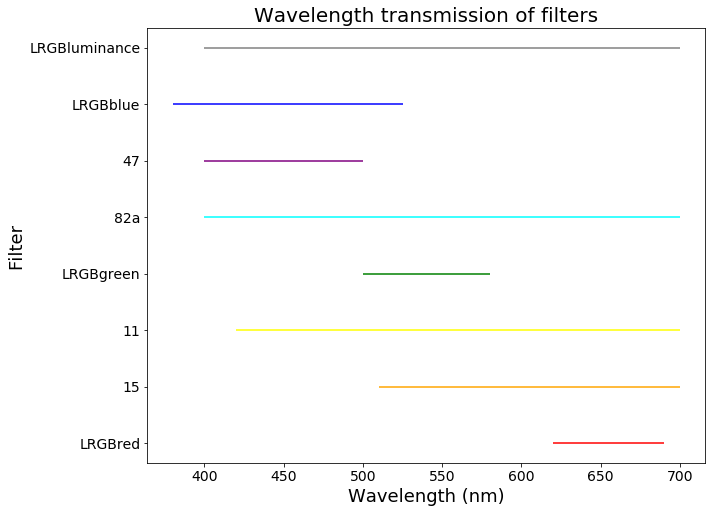

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,8))
y = np.arange(0,8)
order = ['LRGBred', '15', '11', 'LRGBgreen', '82a', '47', 'LRGBblue', 'LRGBluminance']
x1 = [620, 510, 420, 500, 400, 400, 380, 400]
x2 = [690, 700, 700, 580, 700, 500, 525, 700]

# Map value to color
color_mapper = np.vectorize(lambda x: {'LRGBred': 'red', '15': 'orange', '11': 'yellow', 
                                       'LRGBgreen': 'green', '82a': 'cyan', '47': 'purple',
                                       'LRGBblue': 'blue', 'LRGBluminance': 'gray'}.get(x))

# Plot a line for every line of data in your file
plt.hlines(y, x1, x2, colors=color_mapper(order), label='1')
plt.title('Wavelength transmission of filters', fontsize=20)
plt.ylabel('Filter', fontsize=18)
plt.xlabel('Wavelength (nm)', fontsize=18)
plt.yticks(y, order, fontsize=14)
plt.xticks(fontsize=14)
plt.show()

Looks like my estimation of which was redder and which was bluer was correct.

9:45 am

Okay, I think a good idea is to maybe build a file that lists the various things I need to generate plots of each B-V, so I can do it in batch.

In [ ]:
test='FR_B-V_15-11.csv'
import re
test2 = re.sub('FR_B-V_', '', test)
test3 = re.sub('.csv', '', test2)
print(test3)
result = re.search(r'.+(?=-)', test3).group(0)
result2 = re.search(r'(?<=-).+', test3).group(0)
print(result)
print(result2)

In [ ]:
path = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/10April2017_MOON/set1/FR_B-V_15-11.csv'

csvonly = re.search(r'FR.+.csv$', path).group(0)
print(csvonly)

In [ ]:
setpath = re.search(r'.+(?=FR.+.csv$)', path).group(0)
print(setpath)

In [ ]:
m1 = -5.3
m2 = 6.2
import math
print(math.floor(m1))
print(math.ceil(m2))

10:50 am

Okay, I didn't make the file of images and paths and stuff to do this in batch, but I did fully update the plotting script which needed to be done first. It still requires 3 manual inputs at the beginning but it now properly creates plots and places them into a nice folder that it makes if it doesn't exist yet. The folder is under the given set and is under plots/filter1-filter2. 

# 22 April 2017

notes from meeting with BOthun 2:30 pm

Switched B-V in the flux ratio calculation

B-V for daytime sky: ~ -0.3 per The Observer's SKy Atlas, Erich Kark...

Clouds probably redder-- try some larger boxes.

Thick clouds can be blueish -- from the naval academy paper

To try: Open some images in DS9 and use the manual version of polyphot to draw polygons around the sky and around the cloud respectively and see what ballpark values we get.

Moon: ~0.94 (Photometry of the Lunar Surface, Link)

instrumental magnitude = -2.5 * log(cts) 

if know the real magnitude of the box, instrumental magnitude + zero point = real magnitude

Need to find the zero points to be added to B and V so that when I do B-V I get -0.3 for the sky (or appropriate values for moon, sun etc)

zero point should officially be independent of exposure time but for meit won't be because the instrumental magnitudes are different

need to incorporate the zero point so that we can deal with B-V values instead of flux ratios. zero point a function of exposure time.

Understanding zero point: http://www.stsci.edu/documents/dhb/web/c32_wfpc2dataanal.fm1.html

Mean wavelengths for U, B, V: 364 nm for U, 442 nm for B, 540 nm for V. Sun value of 0.63 is based on these values.

another link http://www.starlink.ac.uk/docs/sc17.htx/sc17se14.html

looks very useful: http://image-analysis.readthedocs.io/en/latest/index.html

3:30 pm

# 24 April 2017

8:50 am

To do:
- Study zero point; need to take the counts from the photometry and turn into a magnitude so we can get the actual B-V value
- For a variety of images, open them in DS9 and draw polygons over sky and cloud separately to get photometry. Then calculate flux ratios from there to get a better sense of B-V values in general.
- Do the same for the moon photos--draw over the moon.
- Take photos of sun





10:00 am

Finished doing MANUAL photometry around the moon in the 10 April data set. I did it this way:

## How to do photometry for a manually drawn circular region

1. Open image FIT file (manually using GUI because display command won't work for some reason) in DS9
2. Draw a circular region around the moon. To do so, make sure Region > Shape > Circle is selected, then under Edit, select "Region".
3. Run the polyphot commands, which are stored in the location: `/home/emc/GoogleDrive/Phys/Research/BothunLab/AnalysisFiles/10-April-2017_dataset`.
4. When cursor starts blinking, press `g` to define a polygon. Use the spacebar to trace the circle drawn in DS9 (the circle is just there to make your polygon fairly accurate).
5. When finished drawing polygon, press `q` to finish polygon. 
6. Press `j` to do the photometry of the polygon and send it to the log file.
7. Press `q` again when DS9 in focus and then a second time with terminal in focus.

Now I can just take the single report of counts and get the values for various combinations. Should also do this for the February moon data set to compare.

I need to quickly go down to the science library to reserve a room but then I'll work on zero point.

10:12 am

Now researching zeor point.

10:54 am
    
Quick calculation of B-V for some filters, using moon data.

In [3]:
from math import log10

def m(f):
    """
    calculate the apparent/instrumental magnitude
    """
    return round(-2.5*log10(f),2)

# fluxes for each filter. Taken from photometries
f11 = 40235.62
f15 = 27105.91
f47 = 1686.559
f82a = 59647.08
fred = 12812.36
fgreen = 22084.62
fblue = 13976.66
flum = 60027.88
fnone = 67539.54

m_moon = m(fnone)  # apparent magnitude of moon
print('apparent magnitude of moon (with no filter, 0.7 millisec): {}'.format(m_moon))
print('calibrated magnitude of moon, per Wikipedia, average value: -12.74')
zp = -12.74 - m_moon
print('zero point: {}'.format(zp))

def bv(f1, f2):
    """
    calculate and return a magnitude difference, i.e. the B-V index, for two images
    """
    m1 = -2.5 * log10(f1) + zp
    m2 = -2.5 * log10(f2) + zp
    return m1 - m2

print
print('Moon B-V values in various filters')
print('82a-11: {}'.format(round(bv(f82a, f11), 2)))
print('82a-15: {}'.format(round(bv(f82a, f15),2)))
print('LRGBblue-LRGB red: {}'.format(round(bv(fblue, fred),2)))
print('47-11: {}'.format(round(bv(f47, f11),2)))

apparent magnitude of moon (with no filter, 0.7 millisec): -12.07
calibrated magnitude of moon, per Wikipedia, average value: -12.74
zero point: -0.67

Moon B-V values in various filters
82a-11: -0.43
82a-15: -0.86
LRGBblue-LRGB red: -0.09
47-11: 3.44


# 25 April 2017

2:00 pm

Working on the code above from yesterday. Also: handy table of some apparent magnitudes; https://en.wikipedia.org/wiki/Apparent_magnitude

2:55 pm

Okay, it's looking fairly good. I have a zero point for 0.7 millisec. The problem is that Greg said zero point would be dependent on exposure and all the cloud pictures are at very different exposures, usually around 300 μs. But I think he also said not to worry about it...

3:30

BIG TABLE OF FILTER WAVELENGTHS https://en.wikipedia.org/wiki/Photometric_system

A comparison:

<table>
<tr>
<td colspan=4><b><center>UBV system</center></b></td>
</tr>
<tr>
<td>B filter</td>
<td>B filter FWHM</td>
<td>V filter</td>
<td>V filter FWHM</td>
</tr>
<tr>
<td>445 nm</td>
<td>94 nm</td>
<td>551 nm</td>
<td>88 nm</td>
</tr>
<tr>
<td colspan=4><b><center>My system</center></b></td>
</tr>
<tr>
<td>B filter (#47)</td>
<td>B filter (#47) FWHM</td>
<td>V filter (#11)</td>
<td>V filter (#11) FWHM</td>
</tr>
<tr>
<td>463 nm</td>
<td>~60 nm</td>
<td>550 nm</td>
<td>~110 nm</td>
</tr>
</table>

From http://www.telescope.com/assets/product_files/instructions/29538_02-15.pdf which are the stats for my filters FINALLY!!!!!

Aahh yeah okay the widths are very different for the visual filter. If the visual filter has a much wider passband, it will have a much higher flux, meaning the B-V value is much... lower? But my 47-11 index for the moon is about 3 times as large as it should be. Hmm...

4:00 pm

Asked Elsa for what's going on. She confirmed what Greg said but I failed to write down-- B-V should not be negative unless measuring a super hot star. So why are my values negative??

4:10 pm

Just realized I've been using the counts including the sky for the entire project and I should have been using the flux instead! Need to adjust code to use the right counts, and re-calculate all flux ratios (fine because I had to do that anyway and haven't yet).

4:23 pm

Elsa says I need to get the zero points in every filter, also. I think it would look like this

1. Find the apparent magnitude of moon through a single filter
2. Compare to published value of moon in B or V
3. Difference is zero point for that filter

So now the challenge is finding the published moon magnitudes in the B and V filters...

So far this paper looks the most promising:
- http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1980AJ.....85..314C&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf

It might also be in these:
- http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1962AJ.....67..147V&defaultprint=YES&page_ind=3&filetype=.pdf
- https://arxiv.org/pdf/1510.07574.pdf

but now I'm super hungry and want to go home!

5:00 pm

# 28 April 2017

3:30 pm

Found these values for moon color in this book https://books.google.com/books?hl=en&lr=&id=A883BQAAQBAJ&oi=fnd&pg=PA99&dq=moon+magnitude+in+visual+filter&ots=ckgWQGxmuw&sig=Qvnchx1iIfuEf0r6vappuwzMxc8#v=onepage&q=moon%20magnitude%20in%20visual%20filter&f=false

<img src="nondata images/mooncolors.png" />

Trouble is those aren't the wavelengths I need...

4:30 pm

I think I may have finally found one of the original papers on this matter. It's by Wildey, and specifically, he measured the photometry of 29 different sites on the moon:

http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?db_key=AST&bibcode=1964AJ.....69..619W&letter=0&classic=YES&defaultprint=YES&whole_paper=YES&page=619&epage=619&send=Send+PDF&filetype=.pdf

A nicer labeled image of the sites is from <a href="http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?db_key=AST&bibcode=1964AJ.....69..619W&letter=0&classic=YES&defaultprint=YES&whole_paper=YES&page=619&epage=619&send=Send+PDF&filetype=.pdf">this paper</a> by Winifred Cameron:

<img width=70% src="nondata images/moonsitelabels.png" />
    

The data:

5:00 pm

# 2 May 2017

3:00 pm

Okay, I got hung up last time trying to get the data from the paper. Going to keep trying. Other things to do:

1. Calculate zero points for all filters (divide them into groups, where one group is closer to 'B' and one to 'V')
2. Recalculate B-V values for moon, sun
3. Make sure am using correct counts (the Flux column)
4. Recalculate B-V dataframes for specific combinations of filters on all data sets
5. Plot cloud B-V values which match whatever the moon values are
6. Determine if it all worked or not
7. More pictures


3:43 pm

I FINALLY FOUND THE ORIGINAL ARTCILE. It's in French, the text does not have OCR, and it took half hour of sifting through mysterious French websites but I have it. Now to translate it to make sure I don't misunderstand.

I found it by checking the article Greg found by Link, "photometry of the lunar surface." Link gives the value 0.94 for the moon and cites Gallouet 1963, which is NOT discoverable via Google, Google Scholar or the library, even. It was a long process but at least the citation included the short name of the journal, Compt Rend Acad Sci Paris. Turns out this journal changed names and organization like 5 times in 100 years. Here's the site I found that explains and links to the organization for each time period:

http://www.academie-sciences.fr/en/Transmettre-les-connaissances/comptes-rendus-de-l-academie-des-sciences-numerisees-sur-le-site-de-la-bibliotheque-nationale-de-france.html

Anyway, the result is -12.75 ± 0.01 for the moon in the visual band. The B-V ratio is 0.94 so we just have to do a simple calculatino to get the B out.

In [4]:
from math import log10
v = -12.75
b_v = 0.94
# solve b_v = -2.5 * log10(b/v) for b:
b = (10**(b_v/(-2.5)))*v
print(b)

-5.3642645119


In [5]:
b_v_calc = -2.5*log10(-5.364/-12.75)
b_v_calc

0.9400535389760317

## Published magnitudes of moon in B, V bands
At long last the published values of the moon in the UBV system are 

B = -5.36<br />
V = -12.75

In [7]:
from math import log10

def m(f):
    """
    calculate the apparent/instrumental magnitude
    """
    return round(-2.5*log10(f),2)

def bv(flux_b, flux_v):
    """
    calculate and return a magnitude difference, i.e. the B-V index, for two images
    flux_b: flux through the bluer filter
    flux_v: flux through the visual filter
    """
    m_blue = -2.5 * log10(flux_b) + zp_blue
    m_visual = -2.5 * log10(flux_v) + zp_visual
    return m_blue - m_visual

from math import log10
v = -12.75
b_v = 0.94
# solve b_v = -2.5 * log10(b/v) for b:
b = (10**(b_v/(-2.5)))*v
print('Magnitude in visual filter: {} (Gallouet 1963)'.format(v))
print('B-V of moon: {} (Gallouet 1963)'.format(b_v))
print('Magnitude in blue filter: {} (calculated by solving the b-v equation for b)'.format(b))
print

# fluxes for each filter. Taken from photometries
f11 = 40235.62
f15 = 27105.91
f47 = 1686.559
f82a = 59647.08
fred = 12812.36
fgreen = 22084.62
fblue = 13976.66
flum = 60027.88
fnone = 67539.54

m_moon = m(fnone)  # apparent magnitude of moon with no filter using our camera
print('apparent magnitude of moon (our camera, with no filter, 0.7 millisec): {}'.format(m_moon))
print
# zero points
zp_blue = b - m_moon
zp_visual = v - m_moon
print('Calculated zero point using published values and our measured moon magnitude')
print('blue: {}, visual: {}'.format(zp_blue, zp_visual))

print
print('Moon B-V values in various filters')
print('82a-11: {}'.format(round(bv(f82a, f11), 2)))
print('82a-15: {}'.format(round(bv(f82a, f15),2)))
print('LRGBblue-LRGB red: {}'.format(round(bv(fblue, fred),2)))
print('47-11: {}'.format(round(bv(f47, f11),2)))
print('LRGBblue-LRGBgreen: {}'.format(round(bv(fblue, fgreen), 2)))

Magnitude in visual filter: -12.75 (Gallouet 1963)
B-V of moon: 0.94 (Gallouet 1963)
Magnitude in blue filter: -5.3642645119 (calculated by solving the b-v equation for b)

apparent magnitude of moon (our camera, with no filter, 0.7 millisec): -12.07

Calculated zero point using published values and our measured moon magnitude
blue: 6.7057354881, visual: -0.68

Moon B-V values in various filters
82a-11: 6.96
82a-15: 6.53
LRGBblue-LRGB red: 7.29
47-11: 10.83
LRGBblue-LRGBgreen: 7.88


Well these values are definitely posiive but they should be smaller... we would think. Especially the value for 47-11 which is the closest thing I have to real B-V.

Ranges are for width at full width half max


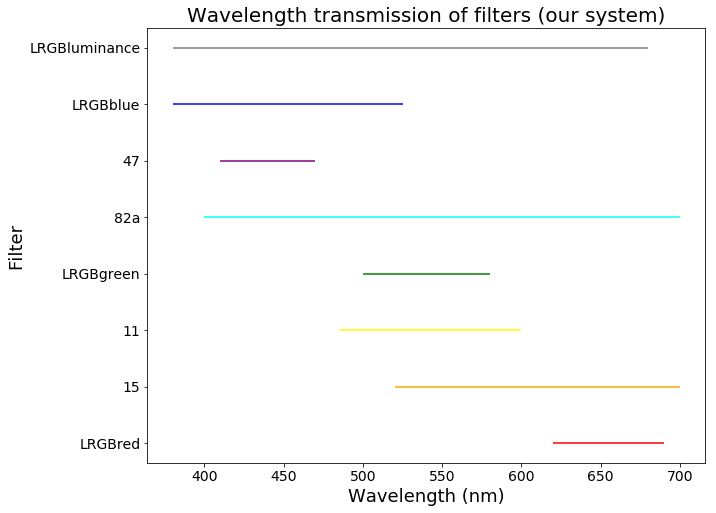

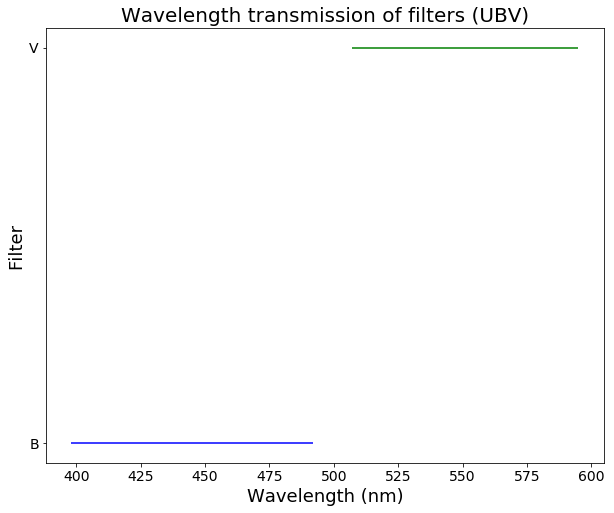

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,8))
y = np.arange(0,8)
order = ['LRGBred', '15', '11', 'LRGBgreen', '82a', '47', 'LRGBblue', 'LRGBluminance']
x1 = [620, 520, 485, 500, 400, 410, 380, 380]
x2 = [690, 700, 600, 580, 700, 470, 525, 680]

# Map value to color
color_mapper = np.vectorize(lambda x: {'LRGBred': 'red', '15': 'orange', '11': 'yellow', 
                                       'LRGBgreen': 'green', '82a': 'cyan', '47': 'purple',
                                       'LRGBblue': 'blue', 'LRGBluminance': 'gray'}.get(x))

print('Ranges are for width at full width half max')
# Plot a line for every line of data in your file
plt.hlines(y, x1, x2, colors=color_mapper(order), label='1')
plt.title('Wavelength transmission of filters (our system)', fontsize=20)
plt.ylabel('Filter', fontsize=18)
plt.xlabel('Wavelength (nm)', fontsize=18)
plt.yticks(y, order, fontsize=14)
plt.xticks(fontsize=14)
plt.show()

fig2 = plt.figure(figsize=(10,8))
y2 = np.arange(0,2)
order_2 = ['B', 'V']
x1_2 = [398, 507]
x2_2 = [492, 595]

# Map value to color
color_mapper = np.vectorize(lambda x: {'B': 'blue', 'V': 'green'}.get(x))

# Plot a line for every line of data in your file
plt.hlines(y2, x1_2, x2_2, colors=color_mapper(order_2))
plt.title('Wavelength transmission of filters (UBV)', fontsize=20)
plt.ylabel('Filter', fontsize=18)
plt.xlabel('Wavelength (nm)', fontsize=18)
plt.yticks(y2, order_2, fontsize=14)
plt.xticks(fontsize=14)
plt.show()



Looks like the LRGB blue and LRGB green filters are actually more similar to actual B and V filters. I've gone back and calculated their B-V value in my system above, which turns out to be: 

LRGBblue-LRGBgreen: 7.88

This still seems high. I emailed Elsa for help.

4:33 pm

Nope, wait, I figured it out. I used the magnitude through the 'none' filter still instead of the correct filters. Need to do what I originally put in my todo list and calculate the zero point for EACH FREAKING FILTER. 

5:03 pm
    
Made some nicer versions of the plots above using HighCharts!

<img src="nondata images/wavelengthrange_ours.png" /> located at http://jsfiddle.net/etacarinae/eh9rj0rj/3/

<img src="nondata images/wavelengthrange_ubv.png" /> located at https://jsfiddle.net/etacarinae/spd7z2cn/



5:15 pm

Okay back to the work of calculating the real-ass zero points.

In [9]:
from math import log10

def m(f):
    """
    calculate the apparent/instrumental magnitude through a given filter.
    
    :param f: the flux through that particular filter.
    """
    return round(-2.5*log10(f),2)

def bv(flux_b, flux_v, zp_blue, zp_visual):
    """
    calculate and return a magnitude difference, i.e. the B-V index, for two images
    
    :param flux_b: flux through the bluer filter
    :param flux_v: flux through the visual filter
    """

    m_blue = -2.5 * log10(flux_b) + zp_blue
    m_visual = -2.5 * log10(flux_v) + zp_visual
    return round(m_blue - m_visual, 2)

# Published values of v and b-v for the moon, and the b value derived from which.
v = -12.75
b_v = 0.94
# solve b_v = -2.5 * log10(b/v) for b:
b = (10**(b_v/(-2.5)))*v
print('Magnitude in visual filter: {}'.format(v))
print('B-V of moon: {}'.format(b_v))
print('Magnitude in blue filter: {} (calculated)'.format(b))
print('(Gallouet 1963)')

# fluxes for each filter. Taken from photometries =============================================
fnone = 67539.54

# visual-er filters: filters with their dominant/central wavelength > 550 nm
f11 = 40235.62
f15 = 27105.91
fred = 12812.36
fgreen = 22084.62

# bluer filters: filters with their dominant/central wavelength < 550 nm
f47 = 1686.559
f82a = 59647.08
fblue = 13976.66
flum = 60027.88

Magnitude in visual filter: -12.75
B-V of moon: 0.94
Magnitude in blue filter: -5.3642645119 (calculated)
(Gallouet 1963)


## Visual-er filters, zero points

In [10]:
# filter #11
# B mag from french paper = your measured B magnitude + zp
# V mag from french paper = your measured V magnitude + zp

m_moon_11 = m(f11)
zp_b_11 = b - m_moon_11
zp_v_11 = v - m_moon_11

print('Apparent magnitude of moon (our camera, filter #11, 0.7 millisec): {}'.format(m_moon_11))
print

print('Calculated zero point using published values and measured moon magnitude in filter #11')
print('blue: {}, visual: {}'.format(zp_b_11, zp_v_11))

Apparent magnitude of moon (our camera, filter #11, 0.7 millisec): -11.51

Calculated zero point using published values and measured moon magnitude in filter #11
blue: 6.1457354881, visual: -1.24


In [11]:
# filter #15
m_moon_15 = m(f15)
zp_b_15 = b - m_moon_15
zp_v_15 = v - m_moon_15

print('Apparent magnitude of moon (our camera, filter #15, 0.7 millisec): {}'.format(m_moon_15))
print

print('Calculated zero point using published values and measured moon magnitude in filter #15')
print('blue: {}, visual: {}'.format(zp_b_15, zp_v_15))

Apparent magnitude of moon (our camera, filter #15, 0.7 millisec): -11.08

Calculated zero point using published values and measured moon magnitude in filter #15
blue: 5.7157354881, visual: -1.67


In [12]:
# filter LRGB red
m_moon_red = m(fred)
zp_b_red = b - m_moon_red
zp_v_red = v - m_moon_red

print('Apparent magnitude of moon (our camera, filter LRGB red, 0.7 millisec): {}'.format(m_moon_red))
print

print('Calculated zero point using published values and measured moon magnitude in filter LRGB red')
print('blue: {}, visual: {}'.format(zp_b_red, zp_v_red))

Apparent magnitude of moon (our camera, filter LRGB red, 0.7 millisec): -10.27

Calculated zero point using published values and measured moon magnitude in filter LRGB red
blue: 4.9057354881, visual: -2.48


In [13]:
# filter LRGB green
m_moon_green = m(fgreen)
zp_b_green = b - m_moon_green
zp_v_green = v - m_moon_green

print('Apparent magnitude of moon (our camera, filter LRGB green, 0.7 millisec): {}'.format(m_moon_green))
print

print('Calculated zero point using published values and measured moon magnitude in filter LRGB green')
print('blue: {}, visual: {}'.format(zp_b_green, zp_v_green))

Apparent magnitude of moon (our camera, filter LRGB green, 0.7 millisec): -10.86

Calculated zero point using published values and measured moon magnitude in filter LRGB green
blue: 5.4957354881, visual: -1.89


## Bluer filters, zero points

In [14]:
# filter #47
m_moon_47 = m(f47)
zp_b_47 = b - m_moon_47
zp_v_47 = v - m_moon_47

print('Apparent magnitude of moon (our camera, filter #47, 0.7 millisec): {}'.format(m_moon_47))
print

print('Calculated zero point using published values and measured moon magnitude in filter #47')
print('blue: {}, visual: {}'.format(zp_b_47, zp_v_47))

Apparent magnitude of moon (our camera, filter #47, 0.7 millisec): -8.07

Calculated zero point using published values and measured moon magnitude in filter #47
blue: 2.7057354881, visual: -4.68


In [15]:
# filter #82a
m_moon_82a = m(f82a)
zp_b_82a = b - m_moon_82a
zp_v_82a = v - m_moon_82a

print('Apparent magnitude of moon (our camera, filter #82a, 0.7 millisec): {}'.format(m_moon_82a))
print

print('Calculated zero point using published values and measured moon magnitude in filter #82a')
print('blue: {}, visual: {}'.format(zp_b_82a, zp_v_82a))

Apparent magnitude of moon (our camera, filter #82a, 0.7 millisec): -11.94

Calculated zero point using published values and measured moon magnitude in filter #82a
blue: 6.5757354881, visual: -0.81


In [16]:
# filter LRGB luminance
m_moon_lum = m(flum)
zp_b_lum = b - m_moon_lum
zp_v_lum = v - m_moon_lum

print('Apparent magnitude of moon (our camera, filter LRGB luminance, 0.7 millisec): {}'.format(m_moon_lum))
print

print('Calculated zero point using published values and measured moon magnitude in filter #lum')
print('blue: {}, visual: {}'.format(zp_b_lum, zp_v_lum))

Apparent magnitude of moon (our camera, filter LRGB luminance, 0.7 millisec): -11.95

Calculated zero point using published values and measured moon magnitude in filter #lum
blue: 6.5857354881, visual: -0.8


In [17]:
# filter LRGB blue
m_moon_blue = m(fblue)
zp_b_blue = b - m_moon_blue
print('equation: {} - {}'.format(b, m_moon_blue))
zp_v_blue = v - m_moon_blue

print('Apparent magnitude of moon (our camera, filter LRGB blue, 0.7 millisec): {}'.format(m_moon_blue))
print

print('Calculated zero point using published values and measured moon magnitude in filter #blue')
print('blue: {}, visual: {}'.format(zp_b_blue, zp_v_blue))

equation: -5.3642645119 - -10.36
Apparent magnitude of moon (our camera, filter LRGB blue, 0.7 millisec): -10.36

Calculated zero point using published values and measured moon magnitude in filter #blue
blue: 4.9957354881, visual: -2.39


## Calculating

In [18]:
print('Moon B-V values in various filters')
print('==================================')
print('LRGBblue-11: {}'.format(bv(fblue, f11, zp_b_blue, zp_v_11)))
print('LRGBblue-15: {}'.format(bv(fblue, f15, zp_b_blue, zp_v_15)))
print('LRGBblue-LRGB red: {}'.format(bv(fblue, fred, zp_b_blue, zp_v_red)))
print('LRGB blue-LRGB green: {}'.format(bv(fblue, fgreen, zp_b_blue, zp_v_green)))
print
print('82a-11: {}'.format(bv(f82a, f11, zp_b_82a, zp_v_11)))
print('82a-15: {}'.format(bv(f82a, f15, zp_b_82a, zp_v_15)))
print('82a-LRGB red: {}'.format(bv(f82a, fred, zp_b_82a, zp_v_red)))
print('82a-LRGB green: {}'.format(bv(f82a, fgreen, zp_b_82a, zp_v_green)))
print
print('47-11: {}'.format(bv(f47, f11, zp_b_47, zp_v_11)))
print('47-15: {}'.format(bv(f47, f15, zp_b_47, zp_v_15)))
print('47-LRGB red: {}'.format(bv(f47, fred, zp_b_47, zp_v_red)))
print('47-LRGB green: {}'.format(bv(f47, fgreen, zp_b_47, zp_v_green)))
print
print('LRGB lum-11: {}'.format(bv(flum, f11, zp_b_lum, zp_v_11)))
print('LRGB lum-15: {}'.format(bv(flum, f15, zp_b_lum, zp_v_15)))
print('LRGB lum-LRGB red: {}'.format(bv(flum, fred, zp_b_lum, zp_v_red)))
print('LRGB lum-LRGB green: {}'.format(bv(flum, fgreen, zp_b_lum, zp_v_green)))


Moon B-V values in various filters
LRGBblue-11: 7.38
LRGBblue-15: 7.38
LRGBblue-LRGB red: 7.38
LRGB blue-LRGB green: 7.38

82a-11: 7.39
82a-15: 7.39
82a-LRGB red: 7.39
82a-LRGB green: 7.39

47-11: 7.39
47-15: 7.39
47-LRGB red: 7.39
47-LRGB green: 7.39

LRGB lum-11: 7.39
LRGB lum-15: 7.39
LRGB lum-LRGB red: 7.39
LRGB lum-LRGB green: 7.39


5:45 pm

A quick summary of the values found...

<table> 
<tr>
<td>Filter</td> <td>Magnitude</td>
</tr>
<tr> 
<td><b>B (UBV)</b></td> <td><b>-5.36</b></td>
</tr>
<tr>
<td>47</td> <td>-8.07</td> 
</tr>
<tr>
<td>LRGB blue</td> <td>-10.36</td> 
</tr>
<tr>
<td>82a</td> <td>-11.94</td> 
</tr>
<tr>
<td>LRGB luminance</td> <td>-11.95</td> 
</tr>
<tr><td><b>V (UBV)</b></td> <td><b>-12.75</b></td>
</tr>
<tr>
<td>11</td> <td>-11.51</td> 
</tr>
<tr>
<td>15</td> <td>-11.08</td>
</tr>
<tr>
<td>LRGB green</td> <td>-10.86</td>  
</tr>
<tr>
<td>LRGB red</td> <td>-10.27</td> 
</tr>


</table>

It seems surprising that the filters I designated as "blueish filters" have magnitudes much closer to that of the real moon through the visual filter. But I don't necessarily think it means I've classified incorrectly--more likely, those particular filters just let in more light than the visual filter. After all, the magnitude is just a straight calculation relating to the logarithm of the flux.

HOWEVER, since the values are still indeed very different from the UBV system, that could possibly explain the unusual B-V values I'm getting.

But they still shouldn't be that high, as I discussed with Elsa. Must be some other problem.... 

Still to do: 

1. Figure out if my zero points are correct, why the B-V values for moon are so high
2. Arrive at final B-V values for moon; calculate them for Sun also 
3. Make sure am using correct counts (the Flux column)
4. Recalculate B-V dataframes for specific combinations of filters on all data sets
5. Plot cloud B-V values which match whatever the moon values are
6. Determine if it all worked or not
7. More pictures

Also I could maybe take some time now to generate photometries for any data sets that I haven't done yet.

6:20 pm

Collected pixel statistics for 21 April and 28 April (Sun). still need to run photometry. Another good idea would be to go through the junkier folders and see what images are salvageable.

7:00 pm

# 3 May 2017

8:00 am

Figured it out with Elsa's help. I was calculating a flux instead of just b. 

    b = (10**(b_v/(-2.5)))*v

should be

    b = v + b_v
    
This is because the first code line up there actually calculates a *flux* not a *magnitude*. DUH

So here is a re-try on the code. Also, I have removed the calculations of zero point for blue or visual depending on which category the filter was classified into.

In [3]:
from math import log10

def m(f):
    """
    calculate the apparent/instrumental magnitude through a given filter.
    
    :param f: the flux through that particular filter.
    """
    return round(-2.5*log10(f),2)


def bv(flux_b, flux_v, zp_blue, zp_visual):
    """
    calculate and return a magnitude difference, i.e. the B-V index, for two images
    
    :param flux_b: flux through the bluer filter
    :param flux_v: flux through the visual filter
    """

    m_blue = -2.5 * log10(flux_b) + zp_blue
    m_visual = -2.5 * log10(flux_v) + zp_visual
    return round(m_blue - m_visual, 2)


# Published values of v and b-v for the moon, and the b value derived from it.
v = -12.75
b_v = 0.94
b = v + b_v
print('Published moon magnitude in visual filter: {}'.format(v))
print('Published B-V of moon: {}'.format(b_v))
print('Magnitude in blue filter (calculated): {}'.format(b))
print('(Published values from Gallouet 1963)')
print

# fluxes for each filter. Taken from photometries ==============================
fnone = 67539.54

# visual-er filters: filters with their dominant/central wavelength > 550 nm
f11 = 40235.62
f15 = 27105.91
fred = 12812.36
fgreen = 22084.62

# bluer filters: filters with their dominant/central wavelength < 550 nm
f47 = 1686.559
f82a = 59647.08
fblue = 13976.66
flum = 60027.88

# Calculating zero points ======================================================
# filter #11 -------------------------------------------------------------------
m_moon_11 = m(f11)
zp_b_11 = b - m_moon_11
zp_v_11 = v - m_moon_11

print('Apparent magnitude of moon (our camera, filter #11, 0.7 millisec)'
      ': {}'.format(m_moon_11))
print('Calculated zero point using published values and measured moon magnitude'
      ' in filter #11')
print('blue: {}, visual: {}'.format(zp_b_11, zp_v_11))
print

# filter #15 -------------------------------------------------------------------
m_moon_15 = m(f15)
zp_b_15 = b - m_moon_15
zp_v_15 = v - m_moon_15

print('Apparent magnitude of moon (our camera, filter #15, 0.7 millisec)'
      ': {}'.format(m_moon_15))
print('Calculated zero point using published values and measured moon magnitude'
      ' in filter #15')
print('blue: {}, visual: {}'.format(zp_b_15, zp_v_15))
print

# filter LRGB red --------------------------------------------------------------
m_moon_red = m(fred)
zp_b_red = b - m_moon_red
zp_v_red = v - m_moon_red

print('Apparent magnitude of moon (our camera, filter LRGB red, 0.7 millisec)'
      ': {}'.format(m_moon_red))
print('Calculated zero point using published values and measured moon magnitude'
      ' in filter LRGB red')
print('blue: {}, visual: {}'.format(zp_b_red, zp_v_red))
print

# filter LRGB green -----------------------------------------------------------
m_moon_green = m(fgreen)
zp_b_green = b - m_moon_green
zp_v_green = v - m_moon_green

print('Apparent magnitude of moon (our camera, filter LRGB green, 0.7 millisec)'
      ': {}'.format(m_moon_green))
print('Calculated zero point using published values and measured moon magnitude'
      ' in filter LRGB green')
print('blue: {}, visual: {}'.format(zp_b_green, zp_v_green))
print

# filter #47 -------------------------------------------------------------------
m_moon_47 = m(f47)
zp_b_47 = b - m_moon_47
zp_v_47 = v - m_moon_47

print('Apparent magnitude of moon (our camera, filter #47, 0.7 millisec)'
      ': {}'.format(m_moon_47))
print('Calculated zero point using published values and measured moon magnitude'
      ' in filter #47')
print('blue: {}, visual: {}'.format(zp_b_47, zp_v_47))
print

# filter #82a ------------------------------------------------------------------
m_moon_82a = m(f82a)
zp_b_82a = b - m_moon_82a
zp_v_82a = v - m_moon_82a

print('Apparent magnitude of moon (our camera, filter #82a, 0.7 millisec)'
      ': {}'.format(m_moon_82a))
print('Calculated zero point using published values and measured moon magnitude'
      ' in filter #82a')
print('blue: {}, visual: {}'.format(zp_b_82a, zp_v_82a))
print

# filter LRGB luminance --------------------------------------------------------
m_moon_lum = m(flum)
zp_b_lum = b - m_moon_lum
zp_v_lum = v - m_moon_lum

print('Apparent magnitude of moon (our camera, filter LRGB luminance, '
      '0.7 millisec)'
      ': {}'.format(m_moon_lum))
print('Calculated zero point using published values and measured moon magnitude'
      ' in filter #lum')
print('blue: {}, visual: {}'.format(zp_b_lum, zp_v_lum))    
print

# filter LRGB blue --------------------------------------------------------------
m_moon_blue = m(fblue)
zp_b_blue = b - m_moon_blue
zp_v_blue = v - m_moon_blue

print('Apparent magnitude of moon (our camera, filter LRGB blue, 0.7 millisec)'
      ': {}'.format(m_moon_blue))
print('Calculated zero point using published values and measured moon magnitude'
      ' in filter #blue')
print('blue: {}, visual: {}'.format(zp_b_blue, zp_v_blue))
print

# Calculate B-V values at long last ============================================

print('Moon B-V values in various filters')
print('==================================')
print('LRGBblue-11: {}'.format(bv(fblue, f11, zp_b_blue, zp_v_11)))
print('LRGBblue-15: {}'.format(bv(fblue, f15, zp_b_blue, zp_v_15)))
print('LRGBblue-LRGB red: {}'.format(bv(fblue, fred, zp_b_blue, zp_v_red)))
print('LRGB blue-LRGB green: {}'.format(bv(fblue, fgreen, zp_b_blue, zp_v_green)))
print
print('82a-11: {}'.format(bv(f82a, f11, zp_b_82a, zp_v_11)))
print('82a-15: {}'.format(bv(f82a, f15, zp_b_82a, zp_v_15)))
print('82a-LRGB red: {}'.format(bv(f82a, fred, zp_b_82a, zp_v_red)))
print('82a-LRGB green: {}'.format(bv(f82a, fgreen, zp_b_82a, zp_v_green)))
print
print('47-11: {}'.format(bv(f47, f11, zp_b_47, zp_v_11)))
print('47-15: {}'.format(bv(f47, f15, zp_b_47, zp_v_15)))
print('47-LRGB red: {}'.format(bv(f47, fred, zp_b_47, zp_v_red)))
print('47-LRGB green: {}'.format(bv(f47, fgreen, zp_b_47, zp_v_green)))
print
print('LRGB lum-11: {}'.format(bv(flum, f11, zp_b_lum, zp_v_11)))
print('LRGB lum-15: {}'.format(bv(flum, f15, zp_b_lum, zp_v_15)))
print('LRGB lum-LRGB red: {}'.format(bv(flum, fred, zp_b_lum, zp_v_red)))
print('LRGB lum-LRGB green: {}'.format(bv(flum, fgreen, zp_b_lum, zp_v_green)))


Published moon magnitude in visual filter: -12.75
Published B-V of moon: 0.94
Magnitude in blue filter (calculated): -11.81
(Published values from Gallouet 1963)

Apparent magnitude of moon (our camera, filter #11, 0.7 millisec): -11.51
Calculated zero point using published values and measured moon magnitude in filter #11
blue: -0.3, visual: -1.24

Apparent magnitude of moon (our camera, filter #15, 0.7 millisec): -11.08
Calculated zero point using published values and measured moon magnitude in filter #15
blue: -0.73, visual: -1.67

Apparent magnitude of moon (our camera, filter LRGB red, 0.7 millisec): -10.27
Calculated zero point using published values and measured moon magnitude in filter LRGB red
blue: -1.54, visual: -2.48

Apparent magnitude of moon (our camera, filter LRGB green, 0.7 millisec): -10.86
Calculated zero point using published values and measured moon magnitude in filter LRGB green
blue: -0.95, visual: -1.89

Apparent magnitude of moon (our camera, filter #47, 0.7 mi

Now figuring out how to fix the `calc_flux_ratios.py` script.

### Applying operation to one column of pandas data frame (to convert fluxes to magnitudes individually):

In [20]:
import pandas as pd
df = {'flux': [10,20,30,40], 'v1': [0, 5, 10, 15], 'v2': [5, 10, 15, 20]}
df = pd.DataFrame(df)
df

,flux,v1,v2
0,10,0,5
1,20,5,10
2,30,10,15
3,40,15,20


In [21]:
df2 = {'flux': [7,7,7,7], 'v1': [0, 5, 10, 15], 'v2': [5, 10, 15, 20]}
df3 = pd.DataFrame({'B-V': df['flux']- df2['flux'], 'v1': df['v1'], 'v2': df['v2']})
df3

,B-V,v1,v2
0,3,0,5
1,13,5,10
2,23,10,15
3,33,15,20


### Nice formatting of zero points so I can put them in variables

In [24]:
from IPython.display import HTML, display
import tabulate
table = [["Filter", "Blue zero point", "Visual zero point"],
         ["----------------------", "Visual Filters", "----------------------"],
         ["11",zp_b_11,zp_v_11],
         ["15",zp_b_15,zp_v_15],
         ["LRGB red",zp_b_red,zp_v_red],
         ["LRGB green",zp_b_green,zp_v_green],
         ["----------------------", "Blue Filters", "----------------------"],
         ["47",zp_b_47,zp_v_47],
         ["82a",zp_b_82a,zp_v_82a],
         ["LRGB blue",zp_b_blue,zp_v_blue],
         ["LRGB luminance",zp_b_lum,zp_v_lum]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Filter,Blue zero point,Visual zero point
----------------------,Visual Filters,----------------------
11,-0.3,-1.24
15,-0.73,-1.67
LRGB red,-1.54,-2.48
LRGB green,-0.95,-1.89
----------------------,Blue Filters,----------------------
47,-3.74,-4.68
82a,0.13,-0.81
LRGB blue,-1.45,-2.39
LRGB luminance,0.14,-0.8


### How to make intelligent pairs of filters--instead of just taking permutations of all files all together

In [25]:
blues = ['47', '82a', 'LRGBblue', 'LRGBluminance']
visuals = ['11', '15', 'LRGBred', 'LRGBgreen']
import itertools
combos = list(itertools.product(blues, visuals))
print(combos)

[('47', '11'), ('47', '15'), ('47', 'LRGBred'), ('47', 'LRGBgreen'), ('82a', '11'), ('82a', '15'), ('82a', 'LRGBred'), ('82a', 'LRGBgreen'), ('LRGBblue', '11'), ('LRGBblue', '15'), ('LRGBblue', 'LRGBred'), ('LRGBblue', 'LRGBgreen'), ('LRGBluminance', '11'), ('LRGBluminance', '15'), ('LRGBluminance', 'LRGBred'), ('LRGBluminance', 'LRGBgreen')]


In [26]:
pathbase = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/3January2017/set1'

paths = [pathbase+'/LRGBblue/200microsec/21-6-42-600.FIT',
         pathbase+'/LRGBgreen/200microsec/21-6-30-700.FIT',
         pathbase+'/LRGBred/200microsec/21-6-42-800.FIT', 
         pathbase+'/LRGBluminance/200microsec/21-6-42-900.FIT', 
         pathbase+'/82a/200microsec/21-5-57-172.FIT',
         pathbase+'/11/200microsec/21-5-34-204.FIT',
         pathbase+'/15/200microsec/21-6-42-988.FIT', 
         pathbase+'/none/200microsec/21-6-57-919.FIT',
         pathbase+'/47/200microsec/21-7-8-45.FIT']

phots = [pathbase+'/LRGBblue/200microsec/21-6-42-600_photometry',
         pathbase+'/LRGBgreen/200microsec/21-6-30-700_photometry',
         pathbase+'/LRGBred/200microsec/21-6-42-800_photometry', 
         pathbase+'/LRGBluminance/200microsec/21-6-42-900_photometry', 
         pathbase+'/82a/200microsec/21-5-57-172_photometry',
         pathbase+'/11/200microsec/21-5-34-204_photometry',
         pathbase+'/15/200microsec/21-6-42-988_photometry', 
         pathbase+'/none/200microsec/21-6-57-919_photometry',
         pathbase+'/47/200microsec/21-7-8-45_photometry']

In [29]:
img_path_pairs = [['',''] for i in range(len(combos))]
phot_path_pairs = [['',''] for i in range(len(combos))]

counter = 0
for combo in combos:
    for i, p in zip(paths, phots):
        b_match_img = re.search('/{}/'.format(combo[0]), i)
        b_match_phot = re.search('/{}/'.format(combo[0]), p)
        v_match_img = re.search('/{}/'.format(combo[1]), i)
        v_match_phot = re.search('/{}/'.format(combo[1]), p)

        if (b_match_img is not None) and (b_match_phot is not None):
            img_path_pairs[counter][0] = i
            phot_path_pairs[counter][0] = p
        if (v_match_img is not None) and (v_match_phot is not None):
            img_path_pairs[counter][1] = i
            phot_path_pairs[counter][1] = p
        else:
            continue
    counter += 1
    
for item, item2 in zip(img_path_pairs, phot_path_pairs):
    print(item)
    print(item2)
    print


['/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/3January2017/set1/47/200microsec/21-7-8-45.FIT', '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/3January2017/set1/11/200microsec/21-5-34-204.FIT']
['/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/3January2017/set1/47/200microsec/21-7-8-45_photometry', '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/3January2017/set1/11/200microsec/21-5-34-204_photometry']

['/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/3January2017/set1/47/200microsec/21-7-8-45.FIT', '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/3January2017/set1/15/200microsec/21-6-42-988.FIT']
['/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/3January2017/set1/47/200microsec/21-7-8-45_photometry', '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/3January2017/set1/15/200microsec/21-6-42-988_photometry']

['/home/emc/GoogleDrive/Phys/R

10:15 am

Time to get ready to go to school!

Note: I guess the official B_V value for the moon is still 0.94. I'll want to plot around this value when I do the cloud pictures.

To Do:

1. continue fixing calc_flux_ratio.py so that it intelligently stores the zero points necessary for the right image paths. Probably use a dictionary of format:
    (47,11): [[zp_b, zp_v], [img_pairs], [phot_pairs]]
2. calculate B-V for Sun also
3. Make sure am using correct counts (the Flux column) and bias is subtracted right
4. Recalculate B-V dataframes for specific combinations of filters on all data sets
5. Plot cloud B-V values which match whatever the moon values are
6. Determine if it all worked or not
7. More pictures


# 4 May 2017

14:00

One hour of picture taking.

15:00


# 7 May 2017

10:00

Today, working on continuing to fix `calc_flux_ratio.py`.

10:15

Okay, after commenting the code I remembered I need to keep track of the zero points. So let's return to the mock up code I made last time and keep track of zero points.

In [29]:
import itertools

blues = ['47', '82a', 'LRGBblue', 'LRGBluminance']
visuals = ['11', '15', 'LRGBred', 'LRGBgreen']
combos = list(itertools.product(blues, visuals))
print(combos)
print

pathbase = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/3January2017/set1'

paths = [pathbase+'/LRGBblue/200microsec/21-6-42-600.FIT',
         pathbase+'/LRGBgreen/200microsec/21-6-30-700.FIT',
         pathbase+'/LRGBred/200microsec/21-6-42-800.FIT', 
         pathbase+'/LRGBluminance/200microsec/21-6-42-900.FIT', 
         pathbase+'/82a/200microsec/21-5-57-172.FIT',
         pathbase+'/11/200microsec/21-5-34-204.FIT',
         pathbase+'/15/200microsec/21-6-42-988.FIT', 
         pathbase+'/none/200microsec/21-6-57-919.FIT',
         pathbase+'/47/200microsec/21-7-8-45.FIT']

phots = [pathbase+'/LRGBblue/200microsec/21-6-42-600_photometry',
         pathbase+'/LRGBgreen/200microsec/21-6-30-700_photometry',
         pathbase+'/LRGBred/200microsec/21-6-42-800_photometry', 
         pathbase+'/LRGBluminance/200microsec/21-6-42-900_photometry', 
         pathbase+'/82a/200microsec/21-5-57-172_photometry',
         pathbase+'/11/200microsec/21-5-34-204_photometry',
         pathbase+'/15/200microsec/21-6-42-988_photometry', 
         pathbase+'/none/200microsec/21-6-57-919_photometry',
         pathbase+'/47/200microsec/21-7-8-45_photometry']

img_path_pairs = [['',''] for i in range(len(combos))]
phot_path_pairs = [['',''] for i in range(len(combos))]

counter = 0
for combo in combos:
    for i, p in zip(paths, phots):
        b_match_img = re.search('/{}/'.format(combo[0]), i)
        b_match_phot = re.search('/{}/'.format(combo[0]), p)
        v_match_img = re.search('/{}/'.format(combo[1]), i)
        v_match_phot = re.search('/{}/'.format(combo[1]), p)

        if (b_match_img is not None) and (b_match_phot is not None):
            img_path_pairs[counter][0] = i
            phot_path_pairs[counter][0] = p
        if (v_match_img is not None) and (v_match_phot is not None):
            img_path_pairs[counter][1] = i
            phot_path_pairs[counter][1] = p
        else:
            continue
    counter += 1

[('47', '11'), ('47', '15'), ('47', 'LRGBred'), ('47', 'LRGBgreen'), ('82a', '11'), ('82a', '15'), ('82a', 'LRGBred'), ('82a', 'LRGBgreen'), ('LRGBblue', '11'), ('LRGBblue', '15'), ('LRGBblue', 'LRGBred'), ('LRGBblue', 'LRGBgreen'), ('LRGBluminance', '11'), ('LRGBluminance', '15'), ('LRGBluminance', 'LRGBred'), ('LRGBluminance', 'LRGBgreen')]



Note: The lists of paths are in the same order as the combos above so we can just use the list of combos to track the zero points.

zero points:

    zp_v_11 = -1.24
    zp_v_15 = -1.67
    zp_v_red = -2.48
    zp_v_green = -1.89
    zp_b_47 = -3.74
    zp_b_82a = 0.13
    zp_b_blue = -1.45
    zp_b_lum = 0.14

In [30]:
# made these variables last time, these are the zero points for each filter.
zp_dict = {'11': -1.24, '15': -1.67, '47': -3.74, '82a': 0.13, 'LRGBred': -2.48, 
           'LRGBgreen': -1.89, 'LRGBblue': -1.45, 'LRGBluminance': 0.14, }

zps = [list(i) for i in combos]

for combo in zps:
    combo[0] = zp_dict[combo[0]]
    combo[1] = zp_dict[combo[1]]

print(zps)

[[-3.74, -1.24], [-3.74, -1.67], [-3.74, -2.48], [-3.74, -1.89], [0.13, -1.24], [0.13, -1.67], [0.13, -2.48], [0.13, -1.89], [-1.45, -1.24], [-1.45, -1.67], [-1.45, -2.48], [-1.45, -1.89], [0.14, -1.24], [0.14, -1.67], [0.14, -2.48], [0.14, -1.89]]


10:30

OKay I think it's all fixed! Now to try it (read: calculate some flux ratios) and doubtlessly troubleshoot but at least the code is put together.

Greg also told me to try this with a much bigger cell--i.e. just draw a cell around the clouds and the sky to see what I get. 

10:56

Ruh roh--the manual photometry files don't contain filter information. I need to go back and 

    a) fill that in 
    b) figure out where I stick that into the photometry file and make it work for when I do it manually
    
Oh, right--it's passed in as a parameter I think, somewhere in `epar polyphot`. When I did this manually I had to call the command manually. So that was the problem. Luckily I can just look in the enclosing folder for the filters, and then insert by hand--because there's only one data point for the photometry of the moon, which is all I had done so far.

In [31]:
dict1 = {'one': [1,1,1], 'two': [2,2,2], 'three': [3,3,3]}
import pandas as pd

df1 = pd.DataFrame(data=dict1)
df1

,one,three,two
0,1,3,2
1,1,3,2
2,1,3,2


In [32]:
df2 = df1.copy(deep=True)
df2['three'] = [9,9,9]
df2.rename(columns={'three': 'nine'}, inplace=True)
df2

,one,nine,two
0,1,9,2
1,1,9,2
2,1,9,2


In [33]:
df3 = df2.copy(deep=True)
df3['nine'] = df2['nine'] - df1['three']
df3.rename(columns={'nine': 'B-V'}, inplace=True)
df3

,one,B-V,two
0,1,6,2
1,1,6,2
2,1,6,2


In [34]:
del df3['one']
df3

,B-V,two
0,6,2
1,6,2
2,6,2


In [35]:
df1

,one,three,two
0,1,3,2
1,1,3,2
2,1,3,2


In [36]:
df2

,one,nine,two
0,1,9,2
1,1,9,2
2,1,9,2


12:00 pm

OK, just about time to go to lunch with parents so have to stop. The B-V files are now successfully created, but the output in them is kind of stupid looking and it's also printing a column that shouldn't be there, so I need to go back and review how the dataframes are created and fix that.

15:00

Back at it after going to lunch!

15:09

Wahoo! It seems to be working and I've calculated the B-V value for the moon in various pairs of filters, and it's quite close to the value in the actual B-V system. Check it out:

In [46]:
path = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/' \
       '10April2017_MOON_1/set1/'
files = !ls SkyPhotos/NewCamera/10April2017_MOON_1/set1 | grep .csv
B_V_moon = {}

for fname in files:
    longf = path + fname
    filters = re.search('(?<=V_).+-.+(?=.csv)', longf).group(0)
    with open(longf, 'r') as f:
        junk = f.readline()
        b_v = f.readline().split(',')[1]
        B_V_moon[filters] = round(float(b_v),2)
        
B_V_moon

{'47-11': 1.04,
 '47-15': 1.04,
 '47-LRGBgreen': 1.03,
 '47-LRGBred': 1.03,
 '82a-11': 0.94,
 '82a-15': 0.94,
 '82a-LRGBgreen': 0.94,
 '82a-LRGBred': 0.93,
 'LRGBblue-11': 0.94,
 'LRGBblue-15': 0.94,
 'LRGBblue-LRGBgreen': 0.94,
 'LRGBblue-LRGBred': 0.93,
 'LRGBluminance-11': 0.94,
 'LRGBluminance-15': 0.94,
 'LRGBluminance-LRGBgreen': 0.94,
 'LRGBluminance-LRGBred': 0.94}

Thinking: right now the code is doing this when it subtracts the bias:

    flux = flux - (bias * area)

Yes... that should be right. From the documentation, 'flux' is the counts per area excluding the sky background, and 'sum' is the counts per area including the sky background.

Therefore, multiplying the bias by the area gives the total to subtract from flux. It doesn't matter whether it's subtracted from flux or sum because it is a constant. But, indeed, I want to use flux, since that excludes the sky background. So the code is fine. I think these B-V values are good.

It's interesting that the values where 47 is the blue filter are significantly higher. However, as I determined earlier, the LRGB blue filter and LRGB green filter are the closest I have to the actual B and V filters in the UBV system, and indeed, their value is 0.94, which is quite close to the actual moon value in UBV. So I'm going to give this a big check mark.<br /><br />

<font size="50">✓</font>

In [47]:
for key,value in B_V_moon.items():
    print('{}: {}'.format(key, value))

82a-15: 0.94
82a-LRGBred: 0.93
47-LRGBgreen: 1.03
LRGBluminance-LRGBgreen: 0.94
82a-11: 0.94
LRGBblue-LRGBgreen: 0.94
47-11: 1.04
LRGBluminance-LRGBred: 0.94
47-15: 1.04
47-LRGBred: 1.03
82a-LRGBgreen: 0.94
LRGBluminance-11: 0.94
LRGBblue-LRGBred: 0.93
LRGBblue-11: 0.94
LRGBluminance-15: 0.94
LRGBblue-15: 0.94


16:19

Update: I'm getting a math error when I try and process the sun photos in the same way; when I look at the first few lines of values, one of the dataframes (the blue one, incidentally) has a negative value in the flux column. Now I remember--Elsa said this value could be negative sometimes. Now that I know a little more about what's going on, I think it's negative when whatever I've established as the sky background is too high of a guess, so the flux (total counts - sky) actually ends up negative. So maybe that's why I'm supposed to use sum. I'll try it here, and then try it again with moon, and see how much it changes my values.

Update 2: I get the same math error when I use the 'counts' column with the sun data. So maybe that's not the reason.

Update 3: Come to think of it, what's probably going on is that the code is trying to take the log10 of 0 or 1 or something.

In [48]:
from math import log10

print(log10(1))
print(log10(0))

0.0


ValueError: math domain error

Yeah, I'm gonna guess that there is some entry in there where it gets a value of 0 inside the log. But then why didn't that happen with the moon data? Hmm.. maybe it's getting an INFINITE value instead? divide by 0 error?

In [41]:
print(log10(255/0))

ZeroDivisionError: integer division or modulo by zero

No, I would get the above message if that was the problem and the error message is

    Traceback (most recent call last):
      File "calc_flux_ratio.py", line 304, in <module>
        BVdf, metadataV, metadataB = get_flux_ratio(phots, zp, pt)
      File "calc_flux_ratio.py", line 203, in get_flux_ratio
        dfB['Counts'] = dfB['Counts'].apply(to_mag_b)
      File "/home/emc/anaconda3/envs/astroconda/lib/python2.7/site-packages/pandas/core/series.py", line 2220, in apply
        mapped = lib.map_infer(values, f, convert=convert_dtype)
      File "pandas/src/inference.pyx", line 1088, in pandas.lib.map_infer (pandas/lib.c:62658)
      File "calc_flux_ratio.py", line 199, in <lambda>
        to_mag_b = lambda x: -2.5 * log10(x) + zp_b
    ValueError: math domain error

Okay, yup, it's getting zeros for some reason. Check it out, I printed some entries in the dataframe where the flux is 0 (actually the counts and area are too, so these rows must be bad):

           Counts  Area(pixels)  Flux               v1               v2  \
    4      0.0           0.0   0.0    [1024.0, 0.0]    [1280.0, 0.0]   
    9      0.0           0.0   0.0  [1024.0, 240.0]  [1280.0, 240.0]   
    14     0.0           0.0   0.0  [1024.0, 480.0]  [1280.0, 480.0]   
    15     0.0           0.0   0.0     [0.0, 720.0]   [256.0, 720.0]   
    16     0.0           0.0   0.0   [256.0, 720.0]   [512.0, 720.0]   
    17     0.0           0.0   0.0   [512.0, 720.0]   [768.0, 720.0]   
    18     0.0           0.0   0.0   [768.0, 720.0]  [1024.0, 720.0]   
    19     0.0           0.0   0.0  [1024.0, 720.0]  [1280.0, 720.0]  
    
Hmm... I removed those rows, and it still has the same error...

Ah, one of the flux is still negative. This also produces a math domain error:

In [42]:
print(log10(-5))

ValueError: math domain error

Okay, got it. But that doesn't leave many cells. Anyway, I'll go ahead and see what it looks like so I can see if any cell overlaps the sun.

In [49]:
# Get FITS data and save for using in matplotlib ===========================
default = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera'
dir_extN = '28April2017_SUN/set1/None/1microsec'
imgN = '16-48-38-732.FIT'
pathN = '/'.join([default, dir_extN, imgN])
img_fileN = pathN if pathN[-4:] == '.FIT' else pathN + '.FIT'
hdu_list = fits.open(img_fileN)
hdu_list.info()
image_data = hdu_list[0].data
hdu_list.close()

dffile = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/28April2017_SUN' \
         '/set1/B-V_LRGBblue-LRGBgreen.csv'
B_V_df = pd.read_csv(dffile)

good = B_V_df.loc[B_V_df['B-V'] != -9999]
print(good['B-V'][:10])

print('MAXIMUM B-V VALUE')
print(good.max(numeric_only=True))
print('MINIMUM B-V VALUE')
print(good.min(numeric_only=True))

# create plot with image as background
fig1 = plt.figure(figsize=(16, 12))
ax1 = fig1.add_subplot(111)
plt.imshow(image_data, cmap='gray')
ax1.set_autoscale_on(False)

# iterate over the rows
p = 0
pt = []
color = np.random.rand(3,1)
for index, row in good.iterrows():
    # collect the vertices for the boxes
    r1 = literal_eval(row['v1'])
    r2 = literal_eval(row['v2'])
    r3 = literal_eval(row['v3'])
    r4 = literal_eval(row['v4'])

    # including the 1st point at the end again allows the boxes to be closed
    x = np.array([r1[0], r2[0], r3[0], r4[0], r1[0]])
    y = np.array([r1[1], r2[1], r3[1], r4[1], r1[1]])

     # ax.scatter(x, y, c='lime') # toggle to turn on plotting vertices
    ax1.plot(x, y, c=color, label=p)
    pt.append([p, row['B-V'], [r1, r2, r3, r4], color])
    p += 1

ax1.set_title('B-V values i dont care')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
#plt.legend()
plt.show()

IOError: [Errno 2] No such file or directory: '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/28April2017_SUN/set1/None/1microsec/16-48-38-732.FIT'

Okay um well whatever, that's not right, but whatever. It doesn't perfectly surround the sun so I'll have to do it manually. That's fine.

16:45

Finished manual photometry of sun!

17:25

## B-V value of sun, 28 April, using flux

In [53]:
path = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/' \
       '28April2017_SUN_1/set1/'
files = !ls SkyPhotos/NewCamera/28April2017_SUN_1/set1 | grep .csv
B_V_sun = {}

for fname in files:
    longf = path + fname
    filters = re.search('(?<=V_).+-.+(?=.csv)', longf).group(0)
    with open(longf, 'r') as f:
        junk = f.readline()
        b_v = f.readline().split(',')[1]
        B_V_sun[filters] = round(float(b_v),2)
        
B_V_sun

{'47-11': 0.31,
 '47-15': 0.17,
 '47-LRGBgreen': 0.43,
 '47-LRGBred': 0.18,
 '82a-11': 1.27,
 '82a-15': 1.13,
 '82a-LRGBgreen': 1.4,
 '82a-LRGBred': 1.14,
 'LRGBblue-11': 0.8,
 'LRGBblue-15': 0.67,
 'LRGBblue-LRGBgreen': 0.93,
 'LRGBblue-LRGBred': 0.68,
 'LRGBluminance-11': 1.15,
 'LRGBluminance-15': 1.02,
 'LRGBluminance-LRGBgreen': 1.28,
 'LRGBluminance-LRGBred': 1.03}

Interesting values. LRGBblue-LRGB red is pretty close to the official value, but the others are kind of spread about this value by +0.6 or -0.3. 

Probably it's so bad because my circular region wasn't centered on the sun every time because the sun was almost out of the frame in some photos.

If I can get another data set of the sun (or if the January one is better) I can try again.

17:30

# 8 May 2017

10:15 am

Good morning! I don't want to do manual photometry on the sun this morning. I think I will do some manual photometry on cloud photos instead. 

Also to do is to sort and organize the photos from 4 May. Actually maybe I'll do that since i'm a bit distracted right now in the reading room.

Okay finished organizing 4 May, wow that took the whole time block.

TODO: Go through 3 January 2017 set 1 and do manual photometry for the clouds.

10:56 am

# 9 May 2017

12:45 

Teehee skipping class to do research. Definitely preferable.

Today I will do some manual photometries. I'm going to do it on Jan 3 set 1 to start with since those pics are very good.

13:25

Got manual photometry of 3 Jan set 1. I generally did 2 polygons, one surrounding the cloud first and one surrounding the sky second. Problem is the cloud moved quite a lot in the images. So let's see what we can get.


## B-V values of clouds, 3 January, set 1, flux column

In [6]:
# fluxes for each filter. Taken from photometries ==============================

# CLOUDS -- using flux column, 3 January 2017 set 1

# visual-er filters: filters with their dominant/central wavelength > 550 nm
c11 = 6186812
c15 = 4190153
cred = 1903930
cgreen = 3441022

# bluer filters: filters with their dominant/central wavelength < 550 nm
c47 = 213802.1
c82a = 8923138
cblue = 1822455
clum = 9807273

# SKY -- using flux column

s11 = 181663.5
s15 = 149922.2
sred = 154275
sgreen = 469763.7

s47 = 21389.94
s82a = 536769.8
sblue = 258108
slum = 1406470

# ZERO POINTS

zp_v_11 = -1.24
zp_v_15 = -1.67
zp_v_red = -2.48
zp_v_green = -1.89
zp_b_47 = -3.74
zp_b_82a = 0.13
zp_b_blue = -1.45
zp_b_lum = 0.14

# Calculate B-V values
cloudbv_flux_b_11 = bv(cblue, c11, zp_b_blue, zp_v_11)
cloudbv_flux_b_15 = bv(cblue, c15, zp_b_blue, zp_v_15)
cloudbv_flux_b_red = bv(cblue, cred, zp_b_blue, zp_v_red)
cloudbv_flux_b_green = bv(cblue, cgreen, zp_b_blue, zp_v_green)

cloudbv_flux_82a_11 = bv(c82a, c11, zp_b_82a, zp_v_11)
cloudbv_flux_82a_15 = bv(c82a, c15, zp_b_82a, zp_v_15)
cloudbv_flux_82a_red = bv(c82a, cred, zp_b_82a, zp_v_red)
cloudbv_flux_82a_green = bv(c82a, cgreen, zp_b_82a, zp_v_green)

cloudbv_flux_47_11 = bv(c47, c11, zp_b_47, zp_v_11)
cloudbv_flux_47_15 = bv(c47, c15, zp_b_47, zp_v_15)
cloudbv_flux_47_red = bv(c47, cred, zp_b_47, zp_v_red)
cloudbv_flux_47_green = bv(c47, cgreen, zp_b_47, zp_v_green)

cloudbv_flux_lum_11 = bv(clum, c11, zp_b_lum, zp_v_11)
cloudbv_flux_lum_15 = bv(clum, c15, zp_b_lum, zp_v_15)
cloudbv_flux_lum_red = bv(clum, cred, zp_b_lum, zp_v_red)
cloudbv_flux_lum_green = bv(clum, cgreen, zp_b_lum, zp_v_green)



# Calculate B-V values at long last ============================================

print('CLOUD B-V values in various filters (3 January 2017, set 1, flux column)')
print('========================================================================')
print('LRGBblue-11: {}'.format(cloudbv_flux_b_11))
print('LRGBblue-15: {}'.format(cloudbv_flux_b_15))
print('LRGBblue-LRGB red: {}'.format(cloudbv_flux_b_red))
print('LRGB blue-LRGB green: {}'.format(cloudbv_flux_b_green))
print
print('82a-11: {}'.format(cloudbv_flux_82a_11))
print('82a-15: {}'.format(cloudbv_flux_82a_15))
print('82a-LRGB red: {}'.format(cloudbv_flux_82a_red))
print('82a-LRGB green: {}'.format(cloudbv_flux_82a_green))
print
print('47-11: {}'.format(cloudbv_flux_47_11))
print('47-15: {}'.format(cloudbv_flux_47_15))
print('47-LRGB red: {}'.format(cloudbv_flux_47_red))
print('47-LRGB green: {}'.format(cloudbv_flux_47_green))
print
print('LRGB lum-11: {}'.format(cloudbv_flux_lum_11))
print('LRGB lum-15: {}'.format(cloudbv_flux_lum_15))
print('LRGB lum-LRGB red: {}'.format(cloudbv_flux_lum_red))
print('LRGB lum-LRGB green: {}'.format(cloudbv_flux_lum_green))
print

# print('SKY B-V values in various filters')
# print('==================================')
# print('LRGBblue-11: {}'.format(bv(sblue, s11, zp_b_blue, zp_v_11)))
# print('LRGBblue-15: {}'.format(bv(sblue, s15, zp_b_blue, zp_v_15)))
# print('LRGBblue-LRGB red: {}'.format(bv(sblue, sred, zp_b_blue, zp_v_red)))
# print('LRGB blue-LRGB green: {}'.format(bv(sblue, sgreen, zp_b_blue, zp_v_green)))
# print
# print('82a-11: {}'.format(bv(s82a, s11, zp_b_82a, zp_v_11)))
# print('82a-15: {}'.format(bv(s82a, s15, zp_b_82a, zp_v_15)))
# print('82a-LRGB red: {}'.format(bv(s82a, sred, zp_b_82a, zp_v_red)))
# print('82a-LRGB green: {}'.format(bv(s82a, sgreen, zp_b_82a, zp_v_green)))
# print
# print('47-11: {}'.format(bv(s47, s11, zp_b_47, zp_v_11)))
# print('47-15: {}'.format(bv(s47, s15, zp_b_47, zp_v_15)))
# print('47-LRGB red: {}'.format(bv(s47, sred, zp_b_47, zp_v_red)))
# print('47-LRGB green: {}'.format(bv(s47, sgreen, zp_b_47, zp_v_green)))
# print
# print('LRGB lum-11: {}'.format(bv(slum, s11, zp_b_lum, zp_v_11)))
# print('LRGB lum-15: {}'.format(bv(slum, s15, zp_b_lum, zp_v_15)))
# print('LRGB lum-LRGB red: {}'.format(bv(slum, sred, zp_b_lum, zp_v_red)))
# print('LRGB lum-LRGB green: {}'.format(bv(slum, sgreen, zp_b_lum, zp_v_green)))

CLOUD B-V values in various filters (3 January 2017, set 1, flux column)
LRGBblue-11: 1.12
LRGBblue-15: 1.12
LRGBblue-LRGB red: 1.08
LRGB blue-LRGB green: 1.13

82a-11: 0.97
82a-15: 0.98
82a-LRGB red: 0.93
82a-LRGB green: 0.99

47-11: 1.15
47-15: 1.16
47-LRGB red: 1.11
47-LRGB green: 1.17

LRGB lum-11: 0.88
LRGB lum-15: 0.89
LRGB lum-LRGB red: 0.84
LRGB lum-LRGB green: 0.89



## B-V values of clouds, 3 January, set 1, sum column

In [4]:
# fluxes for each filter. Taken from photometries ==============================

# CLOUDS -- using sum column 

# visual-er filters: filters with their dominant/central wavelength > 550 nm
c11 = 12896231
c15 = 6994314
cred = 2856538
cgreen = 6327433

# bluer filters: filters with their dominant/central wavelength < 550 nm
c47 = 739465
c82a = 17434141
cblue = 4498042
clum = 17593700

# SKY -- using sum column

s11 = 4660683
s15 = 2218832
sred = 1243155
sgreen = 4070349

s47 = 399153.4
s82a = 7060631
sblue = 2939510
slum = 10330680

# ZERO POINTS

zp_v_11 = -1.24
zp_v_15 = -1.67
zp_v_red = -2.48
zp_v_green = -1.89
zp_b_47 = -3.74
zp_b_82a = 0.13
zp_b_blue = -1.45
zp_b_lum = 0.14

# Calculate B-V values
cloudbv_sum_b_11 = bv(cblue, c11, zp_b_blue, zp_v_11)
cloudbv_sum_b_15 = bv(cblue, c15, zp_b_blue, zp_v_15)
cloudbv_sum_b_red = bv(cblue, cred, zp_b_blue, zp_v_red)
cloudbv_sum_b_green = bv(cblue, cgreen, zp_b_blue, zp_v_green)

cloudbv_sum_82a_11 = bv(c82a, c11, zp_b_82a, zp_v_11)
cloudbv_sum_82a_15 = bv(c82a, c15, zp_b_82a, zp_v_15)
cloudbv_sum_82a_red = bv(c82a, cred, zp_b_82a, zp_v_red)
cloudbv_sum_82a_green = bv(c82a, cgreen, zp_b_82a, zp_v_green)

cloudbv_sum_47_11 = bv(c47, c11, zp_b_47, zp_v_11)
cloudbv_sum_47_15 = bv(c47, c15, zp_b_47, zp_v_15)
cloudbv_sum_47_red = bv(c47, cred, zp_b_47, zp_v_red)
cloudbv_sum_47_green = bv(c47, cgreen, zp_b_47, zp_v_green)

cloudbv_sum_lum_11 = bv(clum, c11, zp_b_lum, zp_v_11)
cloudbv_sum_lum_15 = bv(clum, c15, zp_b_lum, zp_v_15)
cloudbv_sum_lum_red = bv(clum, cred, zp_b_lum, zp_v_red)
cloudbv_sum_lum_green = bv(clum, cgreen, zp_b_lum, zp_v_green)



# Calculate B-V values at long last ============================================

print('CLOUD B-V values in various filters (3 January 2017, set 1, sum column)')
print('========================================================================')
print('LRGBblue-11: {}'.format(cloudbv_sum_b_11))
print('LRGBblue-15: {}'.format(cloudbv_sum_b_15))
print('LRGBblue-LRGB red: {}'.format(cloudbv_sum_b_red))
print('LRGB blue-LRGB green: {}'.format(cloudbv_sum_b_green))
print
print('82a-11: {}'.format(cloudbv_sum_82a_11))
print('82a-15: {}'.format(cloudbv_sum_82a_15))
print('82a-LRGB red: {}'.format(cloudbv_sum_82a_red))
print('82a-LRGB green: {}'.format(cloudbv_sum_82a_green))
print
print('47-11: {}'.format(cloudbv_sum_47_11))
print('47-15: {}'.format(cloudbv_sum_47_15))
print('47-LRGB red: {}'.format(cloudbv_sum_47_red))
print('47-LRGB green: {}'.format(cloudbv_sum_47_green))
print
print('LRGB lum-11: {}'.format(cloudbv_sum_lum_11))
print('LRGB lum-15: {}'.format(cloudbv_sum_lum_15))
print('LRGB lum-LRGB red: {}'.format(cloudbv_sum_lum_red))
print('LRGB lum-LRGB green: {}'.format(cloudbv_sum_lum_green))
print

print('SKY B-V values in various filters, (3 January 2017, set 1, using sum column)')
print('============================================================================')
print('LRGBblue-11: {}'.format(bv(sblue, s11, zp_b_blue, zp_v_11)))
print('LRGBblue-15: {}'.format(bv(sblue, s15, zp_b_blue, zp_v_15)))
print('LRGBblue-LRGB red: {}'.format(bv(sblue, sred, zp_b_blue, zp_v_red)))
print('LRGB blue-LRGB green: {}'.format(bv(sblue, sgreen, zp_b_blue, zp_v_green)))
print
print('82a-11: {}'.format(bv(s82a, s11, zp_b_82a, zp_v_11)))
print('82a-15: {}'.format(bv(s82a, s15, zp_b_82a, zp_v_15)))
print('82a-LRGB red: {}'.format(bv(s82a, sred, zp_b_82a, zp_v_red)))
print('82a-LRGB green: {}'.format(bv(s82a, sgreen, zp_b_82a, zp_v_green)))
print
print('47-11: {}'.format(bv(s47, s11, zp_b_47, zp_v_11)))
print('47-15: {}'.format(bv(s47, s15, zp_b_47, zp_v_15)))
print('47-LRGB red: {}'.format(bv(s47, sred, zp_b_47, zp_v_red)))
print('47-LRGB green: {}'.format(bv(s47, sgreen, zp_b_47, zp_v_green)))
print
print('LRGB lum-11: {}'.format(bv(slum, s11, zp_b_lum, zp_v_11)))
print('LRGB lum-15: {}'.format(bv(slum, s15, zp_b_lum, zp_v_15)))
print('LRGB lum-LRGB red: {}'.format(bv(slum, sred, zp_b_lum, zp_v_red)))
print('LRGB lum-LRGB green: {}'.format(bv(slum, sgreen, zp_b_lum, zp_v_green)))

CLOUD B-V values in various filters (3 January 2017, set 1, sum column)
LRGBblue-11: 0.93
LRGBblue-15: 0.7
LRGBblue-LRGB red: 0.54
LRGB blue-LRGB green: 0.81

82a-11: 1.04
82a-15: 0.81
82a-LRGB red: 0.65
82a-LRGB green: 0.92

47-11: 0.6
47-15: 0.37
47-LRGB red: 0.21
47-LRGB green: 0.48

LRGB lum-11: 1.04
LRGB lum-15: 0.81
LRGB lum-LRGB red: 0.65
LRGB lum-LRGB green: 0.92

SKY B-V values in various filters, (3 January 2017, set 1, using sum column)
LRGBblue-11: 0.29
LRGBblue-15: -0.09
LRGBblue-LRGB red: 0.1
LRGB blue-LRGB green: 0.79

82a-11: 0.92
82a-15: 0.54
82a-LRGB red: 0.72
82a-LRGB green: 1.42

47-11: 0.17
47-15: -0.21
47-LRGB red: -0.03
47-LRGB green: 0.67

LRGB lum-11: 0.52
LRGB lum-15: 0.14
LRGB lum-LRGB red: 0.32
LRGB lum-LRGB green: 1.02


Thoughts:

1. Sun data set could be no good--sun was sometimes near the edge and counts could be off. In fact I am indeed pretty sure it's way off because I got 0.93 for B-V of sun in LRGBblue/green, which is the clsoest to B-V but the correct color is 0.63.
2. Cloud photos--were moving quite a bit. Try on a set that was more consistent.
3. Should I use moon or sun? Is this a question I'm trying to answer or does Greg know which would be better?
4. Elsa says to use flux, not sum. Unfortunately those numbers are even more far off above, so it's time to keep trying I guess.

14:45
    
3 Jan set 3 is a better set to use for the clouds.

Maybe lets try some photometry on the the other sun set...

## Simple script to generate polyphot commands for manual use

In [61]:
base = 'polyphot {} coords="" polygons="" output="{}" sigma={} itime={} ifilter={} skyvalue={} interactive=yes'
dafile = '/home/emc/GoogleDrive/Phys/Research/BothunLab/AnalysisFiles/sun_dataset/files_and_params.txt'
keyE = '5microsec'  # use if there are entries for more than one exposure

with open(dafile,'r') as f:
    f.readline()
    for line in f:
        data = line.split()
        if data:
            if keyE in data[7]:
                fn = data[0]
                outputfn = fn[:-4] + '_photometry_manual'
                sig = data[2]
                sky = data[1]
                e = data[4]
                filt = data[5] + ',' + data[6]
                print(base.format(fn, outputfn, sig, e, filt, sky))


IOError: [Errno 2] No such file or directory: '/home/emc/GoogleDrive/Phys/Research/BothunLab/AnalysisFiles/sun_dataset/files_and_params.txt'

## B-V value of sun, 5 January, flux column

In [62]:
# 5 microsec set, using flux column 

f11 = 4808538
f15 = 3684191
f47 = 1188442
f82a = 5040747
fred = 2794682
fgreen = 3899690
fblue = 2818093
flum = 5105529

sunbv_flux_b_11 = bv(fblue, f11, zp_b_blue, zp_v_11)
sunbv_flux_b_15 = bv(fblue, f15, zp_b_blue, zp_v_15)
sunbv_flux_b_red = bv(fblue, fred, zp_b_blue, zp_v_red)
sunbv_flux_b_green = bv(fblue, fgreen, zp_b_blue, zp_v_green)

sunbv_flux_82a_11 = bv(f82a, f11, zp_b_82a, zp_v_11)
sunbv_flux_82a_15 = bv(f82a, f15, zp_b_82a, zp_v_15)
sunbv_flux_82a_red = bv(f82a, fred, zp_b_82a, zp_v_red)
sunbv_flux_82a_green = bv(f82a, fgreen, zp_b_82a, zp_v_green)

sunbv_flux_47_11 = bv(f47, f11, zp_b_47, zp_v_11)
sunbv_flux_47_15 = bv(f47, f15, zp_b_47, zp_v_15)
sunbv_flux_47_red = bv(f47, fred, zp_b_47, zp_v_red)
sunbv_flux_47_green = bv(f47, fgreen, zp_b_47, zp_v_green)

sunbv_flux_lum_11 = bv(flum, f11, zp_b_lum, zp_v_11)
sunbv_flux_lum_15 = bv(flum, f15, zp_b_lum, zp_v_15)
sunbv_flux_lum_red = bv(flum, fred, zp_b_lum, zp_v_red)
sunbv_flux_lum_green = bv(flum, fgreen, zp_b_lum, zp_v_green)


print('SUN B-V values (5 January 2017, 5 microsec, Flux column)')
print('========================================================')
print('LRGBblue-11: {}'.format(sunbv_flux_b_11))
print('LRGBblue-15: {}'.format(sunbv_flux_b_15))
print('LRGBblue-LRGB red: {}'.format(sunbv_flux_b_red))
print('LRGB blue-LRGB green: {}'.format(sunbv_flux_b_green))
print
print('82a-11: {}'.format(sunbv_flux_82a_11))
print('82a-15: {}'.format(sunbv_flux_82a_15))
print('82a-LRGB red: {}'.format(sunbv_flux_82a_red))
print('82a-LRGB green: {}'.format(sunbv_flux_82a_green))
print
print('47-11: {}'.format(sunbv_flux_47_11))
print('47-15: {}'.format(sunbv_flux_47_15))
print('47-LRGB red: {}'.format(sunbv_flux_47_red))
print('47-LRGB green: {}'.format(sunbv_flux_47_green))
print
print('LRGB lum-11: {}'.format(sunbv_flux_lum_11))
print('LRGB lum-15: {}'.format(sunbv_flux_lum_15))
print('LRGB lum-LRGB red: {}'.format(sunbv_flux_lum_red))
print('LRGB lum-LRGB green: {}'.format(sunbv_flux_lum_green))
print
print('Note: anything involving LRGB red or green could be slightly off still due to lack of centering of the sun in those photos')
print

SUN B-V values (5 January 2017, 5 microsec, Flux column)
LRGBblue-11: 0.37
LRGBblue-15: 0.51
LRGBblue-LRGB red: 1.02
LRGB blue-LRGB green: 0.79

82a-11: 1.32
82a-15: 1.46
82a-LRGB red: 1.97
82a-LRGB green: 1.74

47-11: -0.98
47-15: -0.84
47-LRGB red: -0.33
47-LRGB green: -0.56

LRGB lum-11: 1.31
LRGB lum-15: 1.46
LRGB lum-LRGB red: 1.97
LRGB lum-LRGB green: 1.74

Note: anything involving LRGB red or green could be slightly off still due to lack of centering of the sun in those photos



## B-V values of sun, 5 January, set 1, using sum column

In [63]:
# 5 microsec set, using sum column 

f11 = 6800097
f15 = 4821252
f47 = 1319936
f82a = 7659012
fred = 3552560
fgreen = 4997971
fblue = 3490643
flum = 7716401

sunbv_sum_b_11 = bv(fblue, f11, zp_b_blue, zp_v_11)
sunbv_sum_b_15 = bv(fblue, f15, zp_b_blue, zp_v_15)
sunbv_sum_b_red = bv(fblue, fred, zp_b_blue, zp_v_red)
sunbv_sum_b_green = bv(fblue, fgreen, zp_b_blue, zp_v_green)

sunbv_sum_82a_11 = bv(f82a, f11, zp_b_82a, zp_v_11)
sunbv_sum_82a_15 = bv(f82a, f15, zp_b_82a, zp_v_15)
sunbv_sum_82a_red = bv(f82a, fred, zp_b_82a, zp_v_red)
sunbv_sum_82a_green = bv(f82a, fgreen, zp_b_82a, zp_v_green)

sunbv_sum_47_11 = bv(f47, f11, zp_b_47, zp_v_11)
sunbv_sum_47_15 = bv(f47, f15, zp_b_47, zp_v_15)
sunbv_sum_47_red = bv(f47, fred, zp_b_47, zp_v_red)
sunbv_sum_47_green = bv(f47, fgreen, zp_b_47, zp_v_green)

sunbv_sum_lum_11 = bv(flum, f11, zp_b_lum, zp_v_11)
sunbv_sum_lum_15 = bv(flum, f15, zp_b_lum, zp_v_15)
sunbv_sum_lum_red = bv(flum, fred, zp_b_lum, zp_v_red)
sunbv_sum_lum_green = bv(flum, fgreen, zp_b_lum, zp_v_green)


print('SUN B-V values (5 January 2017, 5 microsec, sum column)')
print('========================================================')
print('LRGBblue-11: {}'.format(sunbv_sum_b_11))
print('LRGBblue-15: {}'.format(sunbv_sum_b_15))
print('LRGBblue-LRGB red: {}'.format(sunbv_sum_b_red))
print('LRGB blue-LRGB green: {}'.format(sunbv_sum_b_green))
print
print('82a-11: {}'.format(sunbv_sum_82a_11))
print('82a-15: {}'.format(sunbv_sum_82a_15))
print('82a-LRGB red: {}'.format(sunbv_sum_82a_red))
print('82a-LRGB green: {}'.format(sunbv_sum_82a_green))
print
print('47-11: {}'.format(sunbv_sum_47_11))
print('47-15: {}'.format(sunbv_sum_47_15))
print('47-LRGB red: {}'.format(sunbv_sum_47_red))
print('47-LRGB green: {}'.format(sunbv_sum_47_green))
print
print('LRGB lum-11: {}'.format(sunbv_sum_lum_11))
print('LRGB lum-15: {}'.format(sunbv_sum_lum_15))
print('LRGB lum-LRGB red: {}'.format(sunbv_sum_lum_red))
print('LRGB lum-LRGB green: {}'.format(sunbv_sum_lum_green))
print
print('Note: anything involving LRGB red or green could be slightly off still due to lack of centering of the sun in those photos')
print

SUN B-V values (5 January 2017, 5 microsec, sum column)
LRGBblue-11: 0.51
LRGBblue-15: 0.57
LRGBblue-LRGB red: 1.05
LRGB blue-LRGB green: 0.83

82a-11: 1.24
82a-15: 1.3
82a-LRGB red: 1.78
82a-LRGB green: 1.56

47-11: -0.72
47-15: -0.66
47-LRGB red: -0.19
47-LRGB green: -0.4

LRGB lum-11: 1.24
LRGB lum-15: 1.3
LRGB lum-LRGB red: 1.78
LRGB lum-LRGB green: 1.56

Note: anything involving LRGB red or green could be slightly off still due to lack of centering of the sun in those photos




    SUN B-V values (28 April 2017 -- probably not good values due to misaligned photos)
    ============================
    LRGBblue-11: 0.8,
    LRGBblue-15: 0.67,
    LRGBblue-LRGBred: 0.68,
    LRGBblue-LRGBgreen: 0.93,
    
    82a-11: 1.27,
    82a-15: 1.13,
    82a-LRGBred: 1.14,
    82a-LRGBgreen: 1.4,
    
    47-11: 0.31,
    47-15: 0.17,
    47-LRGBred: 0.18,
    47-LRGBgreen: 0.43,
    
    LRGBluminance-11: 1.15,
    LRGBluminance-15: 1.02,
    LRGBluminance-LRGBred: 1.03,
    LRGBluminance-LRGBgreen: 1.28

The newer values above (for the 5 January dataset) look a little more reasonable. I think the goal now is to get yet another set of sun photos at 1 microsec and MAKE SURE the sun stays centered in them this time (maybe make the resolution larger to ensure this happens).

Then we can continue doing manual photometry on clouds (3 Jan set 3) and compare again.

Also, ask Greg about the moon or sun.

15:30

16:45

Note: Here are the differences between the clouds and the sun values from 5 January:

In [14]:
# THIS IS NOT VALID BECAUSE I USED DIFFERENT COUNTS COLUMNS

# Differences of cloud B-V values and sun B-V values, using sun data from 5 January, flux col
# cloud data is from 3 January, set 1, using sum column
b_11 = 0.93-0.37
b_15 = 0.7-0.51
b_r = 0.54-1.02
b_g = 0.81-0.79
o82a_11 = 1.04-1.32
o82a_15 = 0.81-1.46
o82a_r = 0.65-1.97
o82a_g = 0.92-1.74
o47_11 = 0.6-(-0.98)
o47_15 = 0.37-(-0.84)
o47_r = 0.21-(-0.33)
o47_g = 0.48-(-0.56)
l_11 = 1.04-1.31
l_15 = 0.81-1.46
l_r = 0.65-1.97
l_g = 0.92-1.74

diffs = [b_11, b_15, b_r, b_g, o82a_11, o82a_15, o82a_r, o82a_g, o47_11, o47_15, o47_r, o47_g,
        l_11, l_15, l_r, l_g]

lbls = ['LRGBblue-11', 'LRGBblue-15', 'LRGBblue-LRGB red', 'LRGB blue-LRGB green',
        '82a-11', '82a-15', '82a-LRGB red', '82a-LRGB green', '47-11', '47-15', 
        '47-LRGB red', '47-LRGB green', 'LRGB lum-11', 'LRGB lum-15', 
        'LRGB lum-LRGB red', 'LRGB lum-LRGB green']

for lbl, diff in zip(lbls, diffs): 
    print('{}: {}'.format(lbl, diff))


LRGBblue-11: 0.56
LRGBblue-15: 0.19
LRGBblue-LRGB red: -0.48
LRGB blue-LRGB green: 0.02
82a-11: -0.28
82a-15: -0.65
82a-LRGB red: -1.32
82a-LRGB green: -0.82
47-11: 1.58
47-15: 1.21
47-LRGB red: 0.54
47-LRGB green: 1.04
LRGB lum-11: -0.27
LRGB lum-15: -0.65
LRGB lum-LRGB red: -1.32
LRGB lum-LRGB green: -0.82


# 10 May 2017

10:00 

Let's plot it, using the sun data from January.

## THIS PLOT IS NOT RIGHT--IGNORE

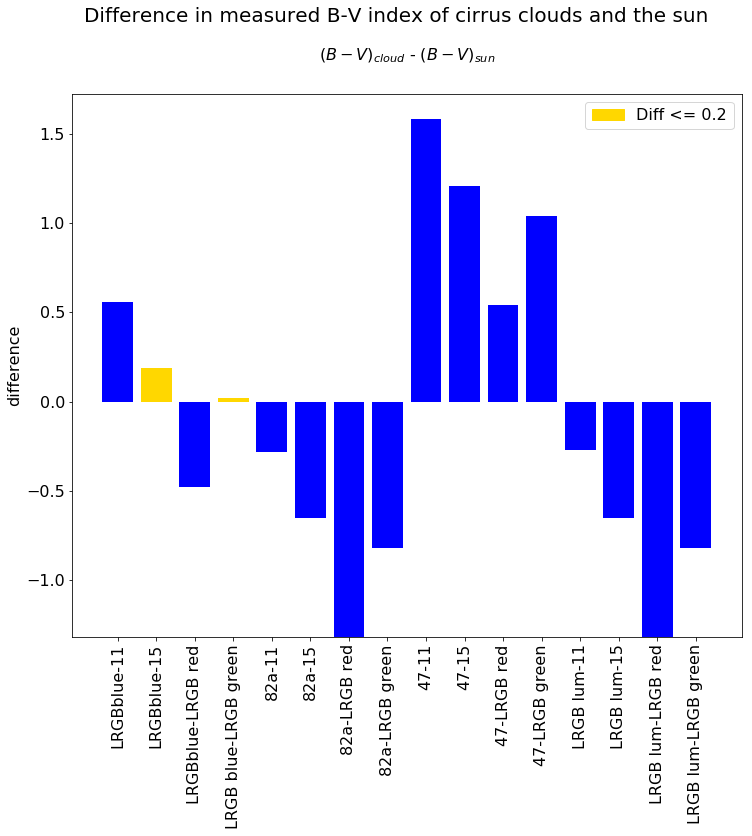

In [50]:
import matplotlib.patches as mpatches 
y_pos = np.arange(len(lbls))

colors = []
for d in diffs:
    if abs(d) <= 0.2:
        colors.append('gold')
    else:
        colors.append('blue')
        
gold = mpatches.Patch(color='gold', label='Diff <= 0.2')

fig = plt.figure(figsize=(12,10))
plt.bar(y_pos, diffs, align='center', color = colors)
plt.legend(handles=[gold], fontsize=16)
plt.xticks(y_pos, lbls, rotation='vertical', fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('difference', fontsize=16)
plt.suptitle('Difference in measured B-V index of cirrus clouds and the sun', y=1, 
             fontsize=20)
plt.title('$(B-V)_{cloud}$ - $(B-V)_{sun}$', y=1.05, fontsize=16)
plt.show()

Now what about the moon values?

In [51]:
lbls

['LRGBblue-11',
 'LRGBblue-15',
 'LRGBblue-LRGB red',
 'LRGB blue-LRGB green',
 '82a-11',
 '82a-15',
 '82a-LRGB red',
 '82a-LRGB green',
 '47-11',
 '47-15',
 '47-LRGB red',
 '47-LRGB green',
 'LRGB lum-11',
 'LRGB lum-15',
 'LRGB lum-LRGB red',
 'LRGB lum-LRGB green']

In [23]:
moonbvs = [0.94, 0.94, 0.93,0.94,0.94,0.94,0.93,0.94,1.04,1.04,1.03,1.03,0.94,0.94,0.94,0.94]

oops time for class

11:00

# 18 May 2017

9:45 am

Been busy with traveling to Colorado and house hunting, etc!

In reviewing the previous stuff, I realize I compared B-V for clouds using the sum column to B-V of the sun using the flux column so I need to fix that.

## B-V differences, clouds and sun, flux column

LRGBblue-11: 0.75
LRGBblue-15: 0.61
LRGBblue-LRGB red: 0.06
LRGB blue-LRGB green: 0.34
82a-11: -0.35
82a-15: -0.48
82a-LRGB red: -1.04
82a-LRGB green: -0.75
47-11: 2.13
47-15: 2.0
47-LRGB red: 1.44
47-LRGB green: 1.73
LRGB lum-11: -0.43
LRGB lum-15: -0.57
LRGB lum-LRGB red: -1.13
LRGB lum-LRGB green: -0.85


<Container object of 16 artists>

([<matplotlib.axis.XTick at 0x7efbfa702cd0>,
 <a list of 16 Text xticklabel objects>)

(array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 <a list of 9 Text yticklabel objects>)

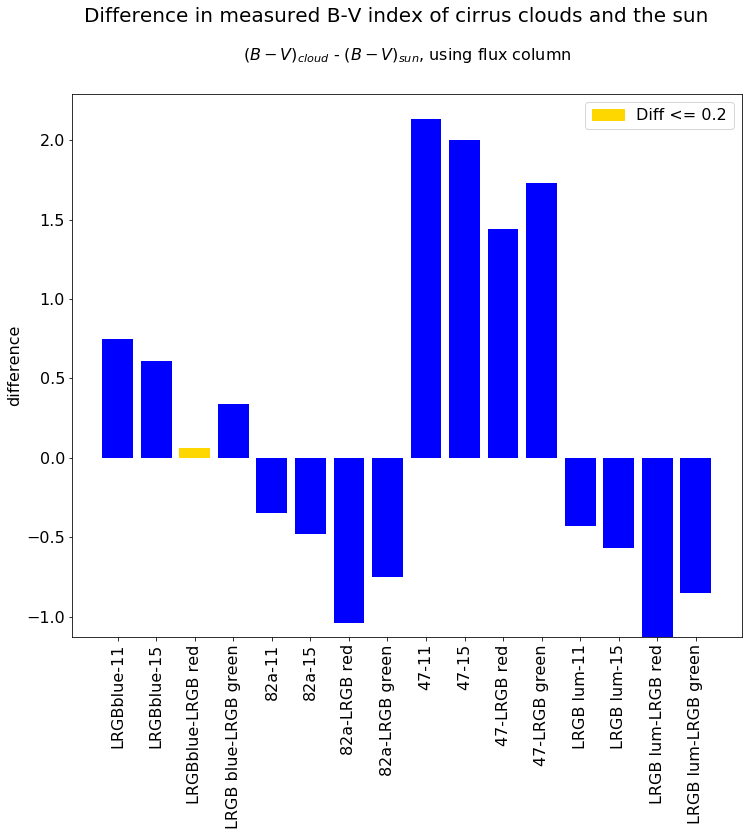

In [65]:
# Differences of cloud B-V values and sun B-V values, using sun data from 5 January, flux col
# cloud data is from 3 January, set 1, using flux column
fluxb_11 = cloudbv_flux_b_11 - sunbv_flux_b_11
fluxb_15 = cloudbv_flux_b_15 - sunbv_flux_b_15
fluxb_r = cloudbv_flux_b_red - sunbv_flux_b_red 
fluxb_g = cloudbv_flux_b_green - sunbv_flux_b_green
flux82a_11 = cloudbv_flux_82a_11 - sunbv_flux_82a_11
flux82a_15 = cloudbv_flux_82a_15 - sunbv_flux_82a_15
flux82a_r = cloudbv_flux_82a_red - sunbv_flux_82a_red
flux82a_g = cloudbv_flux_82a_green - sunbv_flux_82a_green
flux47_11 = cloudbv_flux_47_11 - sunbv_flux_47_11
flux47_15 = cloudbv_flux_47_15 - sunbv_flux_47_15
flux47_r = cloudbv_flux_47_red - sunbv_flux_47_red
flux47_g = cloudbv_flux_47_green - sunbv_flux_47_green 
fluxl_11 = cloudbv_flux_lum_11 - sunbv_flux_lum_11
fluxl_15 = cloudbv_flux_lum_15 - sunbv_flux_lum_15
fluxl_r = cloudbv_flux_lum_red - sunbv_flux_lum_red
fluxl_g = cloudbv_flux_lum_green - sunbv_flux_lum_green

diffs = [fluxb_11, fluxb_15, fluxb_r, fluxb_g, flux82a_11, flux82a_15, flux82a_r, flux82a_g, flux47_11, flux47_15, flux47_r, flux47_g,
        fluxl_11, fluxl_15, fluxl_r, fluxl_g]

lbls = ['LRGBblue-11', 'LRGBblue-15', 'LRGBblue-LRGB red', 'LRGB blue-LRGB green',
        '82a-11', '82a-15', '82a-LRGB red', '82a-LRGB green', '47-11', '47-15', 
        '47-LRGB red', '47-LRGB green', 'LRGB lum-11', 'LRGB lum-15', 
        'LRGB lum-LRGB red', 'LRGB lum-LRGB green']

for lbl, diff in zip(lbls, diffs): 
    print('{}: {}'.format(lbl, diff))
    
import matplotlib.patches as mpatches 
y_pos = np.arange(len(lbls))

colors = []
for d in diffs:
    if abs(d) <= 0.2:
        colors.append('gold')
    else:
        colors.append('blue')
        
gold = mpatches.Patch(color='gold', label='Diff <= 0.2')

fig = plt.figure(figsize=(12,10))
plt.bar(y_pos, diffs, align='center', color = colors)
plt.legend(handles=[gold], fontsize=16)
plt.xticks(y_pos, lbls, rotation='vertical', fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('difference', fontsize=16)
plt.suptitle('Difference in measured B-V index of cirrus clouds and the sun', y=1, 
             fontsize=20)
plt.title('$(B-V)_{cloud}$ - $(B-V)_{sun}$, using flux column', y=1.05, fontsize=16)
plt.show()


## B-V differences, clouds and sun, using sum column

LRGBblue-11: 0.42
LRGBblue-15: 0.13
LRGBblue-LRGB red: -0.51
LRGB blue-LRGB green: -0.02
82a-11: -0.2
82a-15: -0.49
82a-LRGB red: -1.13
82a-LRGB green: -0.64
47-11: 1.32
47-15: 1.03
47-LRGB red: 0.4
47-LRGB green: 0.88
LRGB lum-11: -0.2
LRGB lum-15: -0.49
LRGB lum-LRGB red: -1.13
LRGB lum-LRGB green: -0.64


<Container object of 16 artists>

([<matplotlib.axis.XTick at 0x7efbfa9a1fd0>,
 <a list of 16 Text xticklabel objects>)

(array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5]),
 <a list of 7 Text yticklabel objects>)

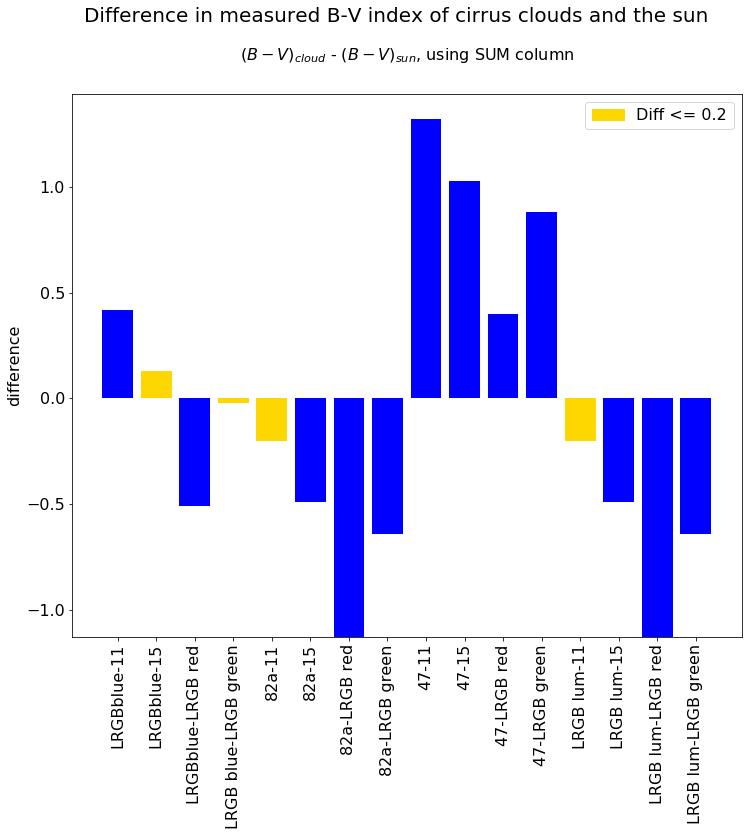

In [67]:
# Differences of cloud B-V values and sun B-V values, using sun data from 5 January, sum col
# cloud data is from 3 January, set 1, using sum column
sumb_11 = cloudbv_sum_b_11 - sunbv_sum_b_11
sumb_15 = cloudbv_sum_b_15 - sunbv_sum_b_15
sumb_r = cloudbv_sum_b_red - sunbv_sum_b_red 
sumb_g = cloudbv_sum_b_green - sunbv_sum_b_green
sum82a_11 = cloudbv_sum_82a_11 - sunbv_sum_82a_11
sum82a_15 = cloudbv_sum_82a_15 - sunbv_sum_82a_15
sum82a_r = cloudbv_sum_82a_red - sunbv_sum_82a_red
sum82a_g = cloudbv_sum_82a_green - sunbv_sum_82a_green
sum47_11 = cloudbv_sum_47_11 - sunbv_sum_47_11
sum47_15 = cloudbv_sum_47_15 - sunbv_sum_47_15
sum47_r = cloudbv_sum_47_red - sunbv_sum_47_red
sum47_g = cloudbv_sum_47_green - sunbv_sum_47_green 
suml_11 = cloudbv_sum_lum_11 - sunbv_sum_lum_11
suml_15 = cloudbv_sum_lum_15 - sunbv_sum_lum_15
suml_r = cloudbv_sum_lum_red - sunbv_sum_lum_red
suml_g = cloudbv_sum_lum_green - sunbv_sum_lum_green

diffs = [sumb_11, sumb_15, sumb_r, sumb_g, sum82a_11, sum82a_15, sum82a_r, sum82a_g, sum47_11, sum47_15, sum47_r, sum47_g,
        suml_11, suml_15, suml_r, suml_g]

lbls = ['LRGBblue-11', 'LRGBblue-15', 'LRGBblue-LRGB red', 'LRGB blue-LRGB green',
        '82a-11', '82a-15', '82a-LRGB red', '82a-LRGB green', '47-11', '47-15', 
        '47-LRGB red', '47-LRGB green', 'LRGB lum-11', 'LRGB lum-15', 
        'LRGB lum-LRGB red', 'LRGB lum-LRGB green']

for lbl, diff in zip(lbls, diffs): 
    print('{}: {}'.format(lbl, diff))
    
import matplotlib.patches as mpatches 
y_pos = np.arange(len(lbls))

colors = []
for d in diffs:
    if abs(d) <= 0.2:
        colors.append('gold')
    else:
        colors.append('blue')
        
gold = mpatches.Patch(color='gold', label='Diff <= 0.2')

fig = plt.figure(figsize=(12,10))
plt.bar(y_pos, diffs, align='center', color = colors)
plt.legend(handles=[gold], fontsize=16)
plt.xticks(y_pos, lbls, rotation='vertical', fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('difference', fontsize=16)
plt.suptitle('Difference in measured B-V index of cirrus clouds and the sun', y=1, 
             fontsize=20)
plt.title('$(B-V)_{cloud}$ - $(B-V)_{sun}$, using SUM column', y=1.05, fontsize=16)
plt.show()


10:40 am

Now... more to-do and more thinking.

To-do

1. Make these same plots, but comparing to the moon
2. Get B-V values for more cloud data sets
3. Get more sun data (when it is sunny)
4. Make plots showing the B-V values of sun and clouds (separate plots) and compare to the official accepted value in B-V 
5. Get more data after cleaning the filters

THINK

1. Are we looking for the filter combination where there is the least discrepancy between the B-V of clouds and sun, OR are we looking for the filter combination that reproduces a value most similar to the published B-V value for the sun?
2. How should error be incorporated? How much of a pain will it be?

## Important notes before I Forget them

1. When I did the manual photometry of the clouds, I always traced the cloud first, so the first entry in the photometry file is the cloud, and the second is the sky.
2. Should only use the flux column to calculate B-V. I re-ran the calculation for the moon set (10 April) and also the sun set (28 April).

## B-V values, moon, 10 April, set 1

In [2]:
# Get the B-V values of the moon

path = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/' \
       '10April2017_MOON_1/set1/'
files = !ls SkyPhotos/NewCamera/10April2017_MOON_1/set1 | grep .csv
B_V_moon = {}

for fname in files:
    longf = path + fname
    filters = re.search('(?<=V_).+-.+(?=.csv)', longf).group(0)
    with open(longf, 'r') as f:
        junk = f.readline()
        dataline = f.readline().split(',')
        b_v = round(float(dataline[1]), 3)
        err = round(float(dataline[3]), 3)
        B_V_moon[filters] = [b_v, err]  # format is b_v value, then error
        
B_V_moon

{'47-11': [1.036, 0.019],
 '47-15': [1.036, 0.019],
 '47-LRGBgreen': [1.034, 0.019],
 '47-LRGBred': [1.027, 0.019],
 '82a-11': [0.942, 0.001],
 '82a-15': [0.942, 0.001],
 '82a-LRGBgreen': [0.94, 0.0],
 '82a-LRGBred': [0.933, 0.002],
 'LRGBblue-11': [0.943, 0.0],
 'LRGBblue-15': [0.943, 0.001],
 'LRGBblue-LRGBgreen': [0.941, 0.0],
 'LRGBblue-LRGBred': [0.934, 0.002],
 'LRGBluminance-11': [0.945, 0.0],
 'LRGBluminance-15': [0.944, 0.001],
 'LRGBluminance-LRGBgreen': [0.942, 0.0],
 'LRGBluminance-LRGBred': [0.936, 0.002]}

## B-V differences, clouds and moon, using flux column

LRGBblue-11: 0.18
LRGBblue-15: 0.18
LRGBblue-LRGB red: 0.15
LRGB blue-LRGB green: 0.19
82a-11: 0.03
82a-15: 0.04
82a-LRGB red: 0.0
82a-LRGB green: 0.05
47-11: 0.11
47-15: 0.12
47-LRGB red: 0.08
47-LRGB green: 0.14
LRGB lum-11: -0.06
LRGB lum-15: -0.05
LRGB lum-LRGB red: -0.1
LRGB lum-LRGB green: -0.05


<Container object of 16 artists>

([<matplotlib.axis.XTick at 0x7fa7d72ed290>,
 <a list of 16 Text xticklabel objects>)

(array([-0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25]),
 <a list of 8 Text yticklabel objects>)

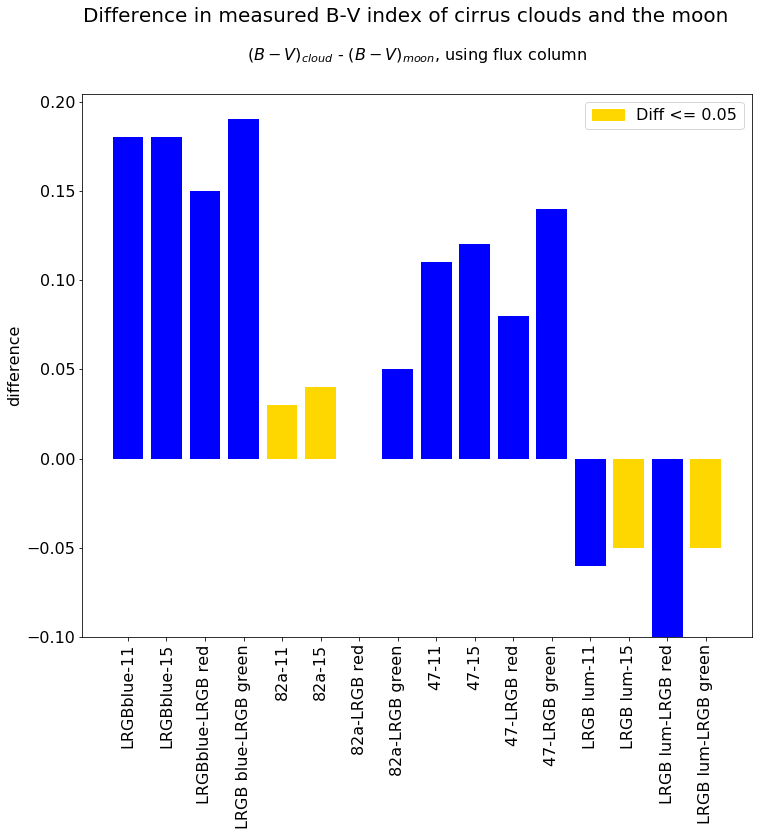

In [7]:
# Calculate B-V values
moonbv_flux_b_11 = 0.94
moonbv_flux_b_15 = 0.94
moonbv_flux_b_red = 0.93
moonbv_flux_b_green = 0.94

moonbv_flux_82a_11 = 0.94
moonbv_flux_82a_15 = 0.94
moonbv_flux_82a_red = 0.93
moonbv_flux_82a_green = 0.94

moonbv_flux_47_11 = 1.04
moonbv_flux_47_15 = 1.04
moonbv_flux_47_red = 1.03
moonbv_flux_47_green = 1.03

moonbv_flux_lum_11 = 0.94
moonbv_flux_lum_15 = 0.94
moonbv_flux_lum_red = 0.94
moonbv_flux_lum_green = 0.94

# Differences of cloud B-V values and moon B-V values, using moon data from 10 April, flux col
# cloud data is from 3 January, set 1, using flux column
mfluxb_11 = cloudbv_flux_b_11 - moonbv_flux_b_11
mfluxb_15 = cloudbv_flux_b_15 - moonbv_flux_b_15
mfluxb_r = cloudbv_flux_b_red - moonbv_flux_b_red 
mfluxb_g = cloudbv_flux_b_green - moonbv_flux_b_green
mflux82a_11 = cloudbv_flux_82a_11 - moonbv_flux_82a_11
mflux82a_15 = cloudbv_flux_82a_15 - moonbv_flux_82a_15
mflux82a_r = cloudbv_flux_82a_red - moonbv_flux_82a_red
mflux82a_g = cloudbv_flux_82a_green - moonbv_flux_82a_green
mflux47_11 = cloudbv_flux_47_11 - moonbv_flux_47_11
mflux47_15 = cloudbv_flux_47_15 - moonbv_flux_47_15
mflux47_r = cloudbv_flux_47_red - moonbv_flux_47_red
mflux47_g = cloudbv_flux_47_green - moonbv_flux_47_green 
mfluxl_11 = cloudbv_flux_lum_11 - moonbv_flux_lum_11
mfluxl_15 = cloudbv_flux_lum_15 - moonbv_flux_lum_15
mfluxl_r = cloudbv_flux_lum_red - moonbv_flux_lum_red
mfluxl_g = cloudbv_flux_lum_green - moonbv_flux_lum_green

diffs = [mfluxb_11, mfluxb_15, mfluxb_r, mfluxb_g, mflux82a_11, mflux82a_15, mflux82a_r, mflux82a_g, mflux47_11, mflux47_15, mflux47_r, mflux47_g,
        mfluxl_11, mfluxl_15, mfluxl_r, mfluxl_g]

lbls = ['LRGBblue-11', 'LRGBblue-15', 'LRGBblue-LRGB red', 'LRGB blue-LRGB green',
        '82a-11', '82a-15', '82a-LRGB red', '82a-LRGB green', '47-11', '47-15', 
        '47-LRGB red', '47-LRGB green', 'LRGB lum-11', 'LRGB lum-15', 
        'LRGB lum-LRGB red', 'LRGB lum-LRGB green']

for lbl, diff in zip(lbls, diffs): 
    print('{}: {}'.format(lbl, diff))
    
import matplotlib.patches as mpatches 
y_pos = np.arange(len(lbls))

colors = []
for d in diffs:
    if abs(d) <= 0.05:
        colors.append('gold')
    else:
        colors.append('blue')
        
gold = mpatches.Patch(color='gold', label='Diff <= 0.05')

fig = plt.figure(figsize=(12,10))
plt.bar(y_pos, diffs, align='center', color = colors)
plt.legend(handles=[gold], fontsize=16)
plt.xticks(y_pos, lbls, rotation='vertical', fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('difference', fontsize=16)
plt.suptitle('Difference in measured B-V index of cirrus clouds and the moon', y=1, 
             fontsize=20)
plt.title('$(B-V)_{cloud}$ - $(B-V)_{moon}$, using flux column', y=1.05, fontsize=16)
plt.show()


Ooh interesting and very exciting! The moon is way more accurate... from this data, preliminarily, it might do to watch the filters 

- 82a and 11
- 82a and 15
- 82a and LRGB red
- LRGB lum and 15
- LRGb lum and LRGB green

which tells us the most useful filters are 82a, LRGB lum and 15. Maybe also 11, red and green.

The weather is turning a bit nasty so it's time to go back to Rosa's.

11:10 am

# 21 May 2017

13:45

Going to think about error today.

14:05

I've reviewed the error and I think this is how to implement it. It's definitely not as hard as I thought. Thanks Taylor / Dean for making me hate/be afraid of error propagation.

## How to propagate error

1. Official error on the sky background value, **SKYVAL ERROR**, is calculated as σ/sqrt(N) as discussed before. This value is already included in each set's `files_and_params.txt`. 
2. **CELL COUNT ERROR** for a given cell/polygon used for photometry is just the cell area * error. The area varies with the size of the grid cell as compared to the total image size, or the size of the manual polygon.
3. The **CELL SUM RANGE** is the range of possible values for the total counts in the cell. The upper and lower limits are defined by the value in the "SUM" field of the photometry, ± CELL COUNT ERROR.
4. **CELL FLUX RANGE** is defined as **CELL SUM RANGE** - **SKYVAL * AREA**. In plain language, subtract the sky background per pixel multiplied by the cell area from both the maximum and minimum SUM (which is flux + sky background, i.e. total counts). **You theoretically can get this value by just subtracting the error value from the raw flux counts but it doesn't seem to work with manual photometries--it produces a different answer**
5. The **B-V RANGE** is calculated by applying the `calc_flux_ratio.py` script to both the upper and lower bounds of **CELL FLUX RANGE**.
6. Center of **B-V RANGE** is calculated by taking the raw **CELL SUM** and going through the above calculations (without looking at the upper and lower bounds).
7. Error on each magnitude (B or V) is $$\delta M = -\frac{2.5\delta F}{F\ln(10)}$$
8. Thus the rules for adding errors in quadrature say that $$\delta (B-V) = \sqrt{(\delta M_b)^2 + (\delta M_v)^2}$$

## Calculating error for manual photometries

### 3 January 2017 set 1

In [92]:
# Get all the entries out of files_and_params.txt file
entries = []
with open('AnalysisFiles/3-Jan-2017_dataset/files_and_params.txt', 'r') as f:
    junk = f.readline()
    for line in f:
        if 'set1' in line:
            entries.append(line.split('\t'))

# set up some lists for iterating
skybg = []
err = []
csum = []
cflux = []
area= []
paths = []
CCE = []
CSR = []
CFR = []
order = ['11', '15', '47', '82a', 'LRGBred', 'LRGBgreen', 'LRGBblue', 'LRGBluminance']

# extract the sky background values, error, and paths to manual photometries in order
for c in range(0,8):
    for entry in entries:
        if entry[5] == order[c]:
            skybg.append(float(entry[1]))
            err.append(float(entry[3]))
            mphotpath = entry[7].strip('\n') + entry[0][:-4] + '_photometry_manual'
            paths.append(mphotpath)
            continue
        else:
            pass

# extract the flux and areas. sum is not needed because only need to subtract error once.
for path in paths:
    with open(path, 'r') as f:
        alllines = f.readlines()
        SAF = alllines[86].split()
    cflux.append(float(SAF[2]))
    csum.append(float(SAF[0]))
    area.append(float(SAF[1]))

# this is tested to be good.
for i in range(0,8):
    CCE.append(area[i] * err[i])
    low = csum[i] - CCE[i]
    high = csum[i] + CCE[i]
    CSR.append([low, high])
    CFR.append([low - skybg[i] * area[i], high - skybg[i] * area[i]])

# rounding
CCE = [round(i, 2) for i in CCE]
CSR = [[round(i[0], 2), round(i[1], 2)] for i in CSR]
CFR = [[round(i[0], 2), round(i[1], 2)] for i in CFR]

for i in range(0, 8):
    print('Cell count error (δF), filter {}: {}'.format(order[i], CCE[i]))
    print('Sum range: {}'.format(CSR[i]))
    print('Flux range: {}'.format(CFR[i]))
    print('Flux mean: {}'.format(cflux[i]))
    print

Cell count error (δF), filter 11: 299016.93
Sum range: [12597214.07, 13195247.93]
Flux range: [5887792.82, 6485826.68]
Flux mean: 6186812.0

Cell count error (δF), filter 15: 465880.96
Sum range: [6528433.04, 7460194.96]
Flux range: [3724272.62, 4656034.55]
Flux mean: 4190153.0

Cell count error (δF), filter 47: 142617.91
Sum range: [596847.09, 882082.91]
Flux range: [71184.29, 356420.11]
Flux mean: 213802.1

Cell count error (δF), filter 82a: 173917.57
Sum range: [17260223.43, 17608058.57]
Flux range: [8749220.39, 9097055.54]
Flux mean: 8923138.0

Cell count error (δF), filter LRGBred: 216856.23
Sum range: [2639681.77, 3073394.23]
Flux range: [1687074.52, 2120786.98]
Flux mean: 1903930.0

Cell count error (δF), filter LRGBgreen: 372276.7
Sum range: [5955156.3, 6699709.7]
Flux range: [3068745.33, 3813298.74]
Flux mean: 3441022.0

Cell count error (δF), filter LRGBblue: 555937.22
Sum range: [3942104.78, 5053979.22]
Flux range: [1266517.62, 2378392.06]
Flux mean: 1822455.0

Cell count er

In [99]:
def dm(df, f):
    """
    error on a magnitude using rule that 
    δ m(f) = sqrt{((∂m)/(∂f)*δf)^2}$
    """
    return (-2.5 * (df)) / (f * m.log(10))

m82a = -2.5*m.log10(cflux[3]) + 0.13
dm82a = dm(CCE[3], cflux[3])

m11 = -2.5*m.log10(cflux[0]) + (-1.24)
dm11 = dm(CCE[0], cflux[0])

m15 = -2.5*m.log10(cflux[1]) + (-1.67)
dm15 = dm(CCE[1], cflux[1])

mlum = -2.5*m.log10(cflux[7]) + 0.14
dmlum = dm(CCE[7], cflux[7])


In [104]:
# some quick scratch calculations of B-V and associated errors for 3 January set 1
BV_82a_15 = m82a - m15
dBV_82a_15 = m.sqrt(dm82a**2 + dm15**2)

BV_82a_11 = m82a - m11
dBV_82a_11 = m.sqrt(dm82a**2 + dm11**2)

BV_lum_15 = mlum - m15
dBV_lum_15 = m.sqrt(dmlum**2 + dm15**2)

print('B-V of 82a-15:')
print('B-V: {}'.format(BV_82a_15))
print('δ(B-V): {}'.format(dBV_82a_15))
print

print('B-V of 82a-11:')
print('B-V: {}'.format(BV_82a_11))
print('δ(B-V): {}'.format(dBV_82a_11))
print
print('B-V of LRGBluminance-15:')
print('B-V: {}'.format(BV_lum_15))
print('δ(B-V): {}'.format(dBV_lum_15))
print

B-V of 82a-15:
B-V: 0.979280678955
δ(B-V): 0.122558050346

B-V of 82a-11:
B-V: 0.972373274097
δ(B-V): 0.0565813720172

B-V of LRGBluminance-15:
B-V: 0.886704041157
δ(B-V): 0.121195246033



16:34

That seems pretty accurate. Only question is that the CCE (cell count error) is ever so slightly different when calculated straight from error x area, versus when it is calculated by following the process above and then finding the difference of the flux given in the photometry and the extremes of flux calculated. HMm... does it matter? what could it be?

In any case, it's time to implement it into the code base... the main trouble is that the error is stored in `files_and_params.txt` but isn't passed do the photometry code when doing photometry. And even so, if I do manual photometry, the `polyphot_batch.py` script doesn't even run, so we need to pick up the error in some other way.

Note to self: polyphot documentation explains sum, area, magnitude etc really clearly...

    Sum, area, and flux are the total number of counts including sky in the polygonal aperture, the area of the aperture in square pixels, and the total number of counts in the aperture excluding sky. Mag and merr are the magnitude and error in the magnitude in the aperture after subtracting the sky value (see below).

            flux = sum - area * msky
             mag = zmag - 2.5 * log10 (flux) + 2.5 * log10 (itime)
            merr = 1.0857 * error / flux
           error = sqrt (flux / epadu + area * stdev**2 +
                   area**2 * stdev**2 / nsky)


16:43 

Okay, so suppose I'm in the `calc_flux_ratio.py` script and I've got some photometry file loaded. I need to gather the count error for that particular file. It's in the `files_and_params.txt` file, which will generally be in the dated folder for the image set. Thus, here's how I can get the error info.


In [123]:
photfile = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/3January2017/' \
           'set1/11/200microsec/21-5-34-204_photometry_manual'
    
timestamp = re.search('(?<=sec\/).+(?=_pho)', photfile).group(0)
date = re.search('(\d+[A-Za-z]+\d+)', photfile).group(0)
date
paramfilepath = 'SkyPhotos/NewCamera/{}/files_and_params.txt'

with open(paramfilepath.format(date), 'r') as f:
    stuff = f.readlines()
    stuff = [i.split('\t') for i in stuff if i != '\n']
for s in stuff:
    if timestamp in s[0]:
        print('Found error: {}'.format(s[3]))

'3January2017'

Found error: 1.75481480504


17:15

Okay, I implemented the above code in `calc_flux_ratio.py`, and also implemented code to calculate the error of the B-V magnitude. I need to check to make sure I did it right, but it's time to go to the airport

# 25 May 2017

12:45 

Finishing up testing on the error.

13:07

Finished testing error and it now successfully prints to the B-V csv. 

Cotinuing on,

To-do

    More manual photometry on clouds
    Finally calculate B-V values for more cloud data sets
    Get more sun data (when it is sunny)
    Make plots showing the B-V values of sun and clouds (separate plots) and compare to the official accepted value in B-V for the sun
    Get more data after cleaning the filters

THINK

    Are we looking for the filter combination where there is the least discrepancy between the B-V of clouds and sun, OR are we looking for the filter combination that reproduces a value most similar to the published B-V value for the sun?
    
13:26

I think right now it's best to go through the folders of clouds and decide what's good data and what isn't.

In a rating of 1-5, 1 being best data, 5 being worst:

2016
- 12May2016: 4; nice fields of clouds, some may not be cirrus, only data for 11, 15, 82a.
- 8Sep2016: bad; photos taken with 2 filters at once
- 18Sept2016: bad; double filters
- 26Sept2016: 5; images are pretty dim, few clouds, some double-filter folders
- 30Sept2016: 5; incomplete filter set; clouds hard to discern
- 8October2016 set2: 5; apparently it was questionable data for some reason according to my past self
- 8October2016 set1: 3; a few good cloud fields that are consistent to compare but only for a few filters 
- **9October2016: 2; not always of same cloud; some really good pictures; mix of filters available in many sets**
- 28October2016: 3; nice cloud features and fields, but only a few filters
- **29October2016: 2; excellent examples of cirrus clouds, fields move around a bit too fast, not very many filters, worth a look though**

2017
- **3January2017: 1; 4 sets, good clouds (maybe a few non-cirrus), consistent fields, consistent filters**
- **4May2017: 1; 5 sets, generally good clouds, consistent fields**
- **5January2017_SUN: 1; the better sun set. still need one where the sun is consistently centered. Needs the exposure folders to be fixed.**
- **10April2017_MOON: 1; best moon set.**
- **10May2017: 1; 4 sets, great clouds, consistent fields, all filters. Need to organize the sub folders as this is not yet done.**
- **11February2017_MOON: 2; a backup moon set**
- 21April2017: 3; field covers images; clouds look a little fluffy. Halo day
- **22May2017: 1; great clouds and fields. Still needs to be organized.**
- **28April2017_SUN: 1; a decent sun set.**




14:44

Finished organizing the 10 May folder. set4 was saved in BMP :(

14:58

Need to organize set 2 of 22 May. Now it's time for journal club


# 26 May 2017

13:15
   
Finishing organizing 22 May.

14:58

That was a long bout of yak-shaving. I had to fix a bunch of bugs because I was trying to generate manual commands. I fixed:

- Manual command generating script
- Some screwed up sky stat files in 3 January set 2
- Moved all the sky stat files for 3 January back into the folders with their associated images, because they were all in "AnalysisFiles" which is no longer a supported location for the sky stat files
- Re-ran tidy_stats on 3Jan
- finally generated all the manual commands.

## BIG TO DO LIST BY DATASET

3January2017
- Manual photometry
- B-V values

4May2017
- collect_skystats
- tidy_stats
- generate_manual_cmds
- Manual photometry
- B-V values

5January2017_SUN
- re-calculate B-V values now that error is included

10April2017_MOON
- nothing at this time

10May2017
- collect_skystats
- tidy_stats
- generate_manual_cmds
- Manual photometry
- B-V values

22May2017
- collect_skystats
- tidy_stats
- generate_manual_cmds
- Manual photometry
- B-V values

28April2017_SUN
- re-run B-V calculation now that error is included

second priority folders:

9October2016
- Fix folder names
- Move the skystats files back into their image folders and rename them
- Move the files_and_params file back into it
- generate_manual_cmds
- Manual photometry
- B-V values

11February2017
- Delete old flux ratio files

29October2016
- Rename files so that they are for time-8
- collect_skystats
- tidy_stats
- generate_manual_cmds
- Manual photometry
- B-V values

15:07

Now going to take some sun photos. Still need cleaning solution. Alice said "Trevor" may be able to help me (a grad student) or I could ask Bothun about shopping at the chem store.

16:00

16:26

Doing sky stats on 4May, but I accidentally clicked wrong in DS9 and it errored out just as Carol got here. It had a problem on LRGBred in set3 but LRGBluminance was successful right before that. Pick this up later.

    Current image /home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/4May2017_1/set3/LRGBluminance/150microsec/14-31-31-334.FIT


    Saving imexam commands to '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/4May2017_1/set3/LRGBred/150microsec/14-31-6-657_sky'

16:37

# 27 May 2017

9:07 

Starting again on 4 May

Finished 4 May

** * FIRST PRIORITY: * **

**3January2017**

Manual photometry  
B-V values  

**4May2017**

<s>collect_skystats</s>  
<s>tidy_stats</s>  
<s>generate_manual_cmds</s>   
Manual photometry  
B-V values  

**5January2017_SUN**

re-calculate B-V values now that error is included  

**10April2017_MOON**

nothing at this time  

**10May2017**

<s>collect_skystats</s>  
<s>tidy_stats</s>  
<s>generate_manual_cmds</s>  
Manual photometry  
B-V values  

**22May2017**

<s>collect_skystats</s>  
<s>tidy_stats</s>  
<s>generate_manual_cmds</s>  
Manual photometry  
B-V values  

**28April2017_SUN**

re-run B-V calculation now that error is included  

** * SECOND PRIORITY:* **

**9October2016**

Fix folder names  
Move the skystats files back into their image folders and rename them  
Move the files_and_params file back into it  
generate_manual_cmds  
Manual photometry  
B-V values  

**11February2017**

<s>Delete old flux ratio files</s>  

**29October2016**

Rename files so that they are for time-8  
<s>collect_skystats</s>  
<s>tidy_stats</s>  
<s>generate_manual_cmds</s>  
Manual photometry  
B-V values  
  

10:36

Fixed a problem with the regular expression for finding the filter in `tidy_stats.py` that was finding false detections in things like the seconds place of the filename, etc. Reran tidy_stats and manual commands for 4May, 10May, 22May.

11:00 

Taking a break for a while

11:52 

Back at it. Time for some manual photometry.

12:48
    
Manual photometry progress

3January2017

<s>set1</s>  
<s>set2</s>  
set3  
set4  

4May2017
 
set1  
set2  
set3  
set4  
set5  

10May2017

set1  
set2  
set3  

22May2017

set1  
set2  

OTHER STILL TO DO:

9October2016

Fix folder names  
Move the skystats files back into their image folders and rename them  
Move the files_and_params file back into it  
generate_manual_cmds  
Manual photometry  
B-V values  

29October2016

set1  

14:00 

Fixed the same regex error in `calc_flux_ratio.py`. Prepared the 26May sun data set, which is not in the todo lists above because I just did it yesterday.

Let's see if we can quickly show the B-V values for that sun data set. Note that it's still not perfect--there are some lens flares, and in the LRGB blue picture, the sun is super wonky and distorted-- filters def neeed to be cleaned.

## Sun B-V values, 26 May 2017, 1 microsec, flux column

In [18]:
path = '/home/emc/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/' \
       '26May2017_SUN/set1/'
files = !ls SkyPhotos/NewCamera/26May2017_SUN/set1 | grep .csv
B_V_sun = {}

for fname in files:
    longf = path + fname
    filters = re.search('(?<=V_).+-.+(?=.csv)', longf).group(0)
    with open(longf, 'r') as f:
        junk=f.readline()
        b_v = f.readline().split(',')[1]
        B_V_sun[filters] = round(float(b_v),2)
        
B_V_sun

{'47-11': -0.05,
 '47-15': -0.07,
 '47-LRGBgreen': 0.22,
 '47-LRGBred': 0.19,
 '82a-11': 1.22,
 '82a-15': 1.2,
 '82a-LRGBgreen': 1.49,
 '82a-LRGBred': 1.46,
 'LRGBblue-11': 0.42,
 'LRGBblue-15': 0.4,
 'LRGBblue-LRGBgreen': 0.69,
 'LRGBblue-LRGBred': 0.66,
 'LRGBluminance-11': 1.21,
 'LRGBluminance-15': 1.19,
 'LRGBluminance-LRGBgreen': 1.48,
 'LRGBluminance-LRGBred': 1.45}

Compare to that for 5 January:

    SUN B-V values (5 January 2017, 5 microsec, Flux column)
    ========================================================
    LRGBblue-11: 0.37
    LRGBblue-15: 0.51
    LRGBblue-LRGB red: 1.02
    LRGB blue-LRGB green: 0.79

    82a-11: 1.32
    82a-15: 1.46
    82a-LRGB red: 1.97
    82a-LRGB green: 1.74

    47-11: -0.98
    47-15: -0.84
    47-LRGB red: -0.33
    47-LRGB green: -0.56

    LRGB lum-11: 1.31
    LRGB lum-15: 1.46
    LRGB lum-LRGB red: 1.97
    LRGB lum-LRGB green: 1.74

Not a lot of consistency... the moon values are way better.

14:11

15:00

Did some more yak-shaving. RE-ran B-V for 10 April moon; fixed up the sun data set from 5 January. Re-ran the difference plots above. I want to make the plot again but including the error bars. 

Also found cleaning fluid and emailed Bothun about buying it: http://www.telescope.com/Orion-Optics-Cleaning-Fluid-for-Coated-Lenses/p/5810.uts?keyword=optical%20cleaning%20fluid

also available on amazon: https://www.amazon.com/Orion-5810-Optics-Cleaning-Coated/dp/B0000XMU4Q

TODO:

1. Continue with the manual photometry and calculating B-V
2. Update plotting routine to incorporate error bars (need to propagate error a little more)
3. Update the official plotting script with the plotting routine in this notebook
4. Make B-V plots etc for current data
5. Clean optics
6. Get more data

15:05

# 29 May 2017

13:30

Continuing with the todo list from above. I think I will work on updating the plotting routine today...

**IMPORTANT NOTE** if the calc_flux_ratio script is failing with missing files, you probably didn't do the manual photometry for the None image. You need to do this. 

14:00

break while Hilary was here

14:30

In [16]:
# Get the B-V values of the CLOUDS from the BV files. cloud entry is the first one in
# the photometry file.
# this example is with 3 January 2017 set 1

path = '/home/inkabink/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/' \
       '3January2017_1/set1/'
files = !ls SkyPhotos/NewCamera/3January2017_1/set1 | grep .csv
filtercombos = []
cloudbv = []
clouderr = []

for fname in files:
    longf = path + fname
    filters = re.search('(?<=V_).+-.+(?=.csv)', longf).group(0)
    filtercombos.append(filters)
    
    with open(longf, 'r') as f:
        junk = f.readline()
        dataline = f.readline().split(',')
        b_v = round(float(dataline[1]), 3)
        err = round(float(dataline[3]), 3)
        cloudbv.append(b_v)
        clouderr.append(err)
        
# Get the B-V values of the moon

path = '/home/inkabink/GoogleDrive/Phys/Research/BothunLab/SkyPhotos/NewCamera/' \
       '10April2017_MOON_1/set1/'
files = !ls SkyPhotos/NewCamera/10April2017_MOON_1/set1 | grep .csv
moonbv = []
moonerr = []

for fname in files:
    longf = path + fname
    filters = re.search('(?<=V_).+-.+(?=.csv)', longf).group(0)
    with open(longf, 'r') as f:
        junk = f.readline()
        dataline = f.readline().split(',')
        b_v = round(float(dataline[1]), 3)
        err = round(float(dataline[3]), 3)
        moonbv.append(b_v)
        moonerr.append(err)

# Calculate raw differences of cloud and moon B-V
diffs = []
for a, b in zip(cloudbv, moonbv):
    diffs.append(a - b)

(-1.9690000000000001,
 15.968999999999999,
 -0.23100000000000001,
 0.43100000000000011)

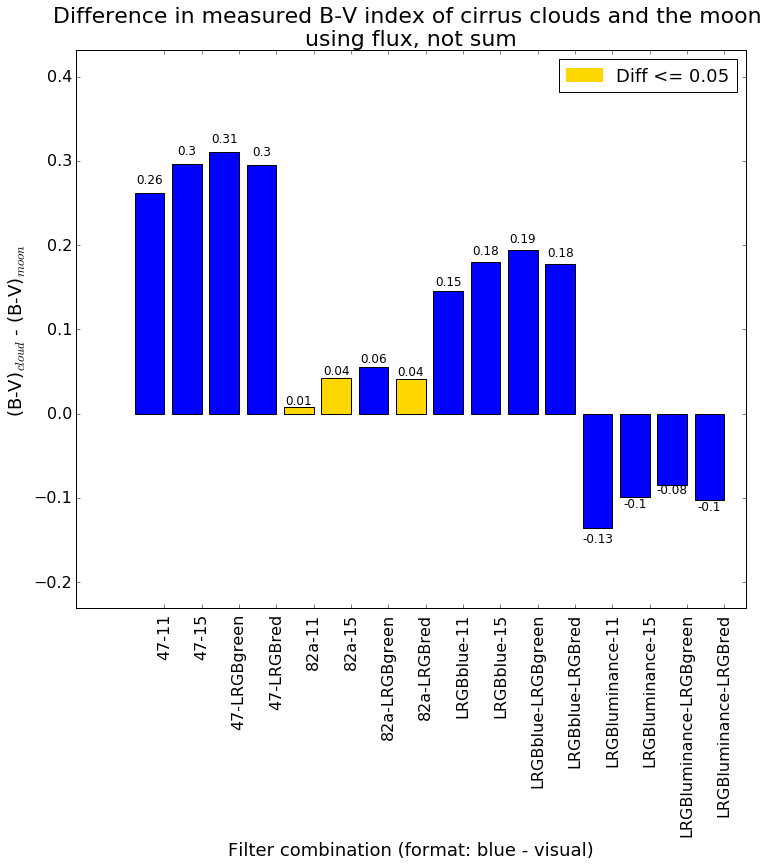

In [27]:
import matplotlib.patches as mpatches 

def autolabel(rects, vals):
    """
    Attach a text label above each bar displaying its height
    """
    # get the sign of each value
    signs = [i / abs(i) for i in vals]
    
    for r, s in zip(rects, signs):
        height = r.get_height()
        multiplier = 1.15 if s < 0 else 1.03   # lets us put labels under negative-valued bars
        ax.text(r.get_x() + r.get_width()/2., s*multiplier*height, '{}'.format(round(s * height, 2)),
                ha='center', va='bottom', fontsize=12)

        
ind = np.arange(len(filtercombos))

# Determines whether to color a bar gold or blue depending on the value
colors = []
for d in diffs:
    if abs(d) <= 0.05:
        colors.append('gold')
    else:
        colors.append('blue')
        
gold = mpatches.Patch(color='gold', label='Diff <= 0.05')

# Make the plot
width = 0.8
fig, ax = plt.subplots(figsize=(12,10))
bars = ax.bar(ind, diffs, width, align='center', color=colors, alpha=1)

xt = ax.set_xticks(ind + width / 2)
xtl = ax.set_xticklabels(filtercombos, rotation="vertical")
plt.tick_params(axis='both', which='major', labelsize=16)

lg = ax.legend(handles=[gold], fontsize=18)
ylbl = ax.set_ylabel('(B-V)$_{cloud}$ - (B-V)$_{moon}$', fontsize=18)
xlbl = ax.set_xlabel('Filter combination (format: blue - visual)', fontsize = 18)
titl = ax.set_title('Difference in measured B-V index of cirrus clouds and the moon \n' \
                    'using flux, not sum', y=1, 
                       fontsize=22)

autolabel(bars, diffs)

margin = max(diffs) * 0.1

x0, x1, y0, y1 = plt.axis()
plt.axis((x0 + margin,
          x1 - margin,
          y0 - margin,
          y1 + margin))

plt.show()

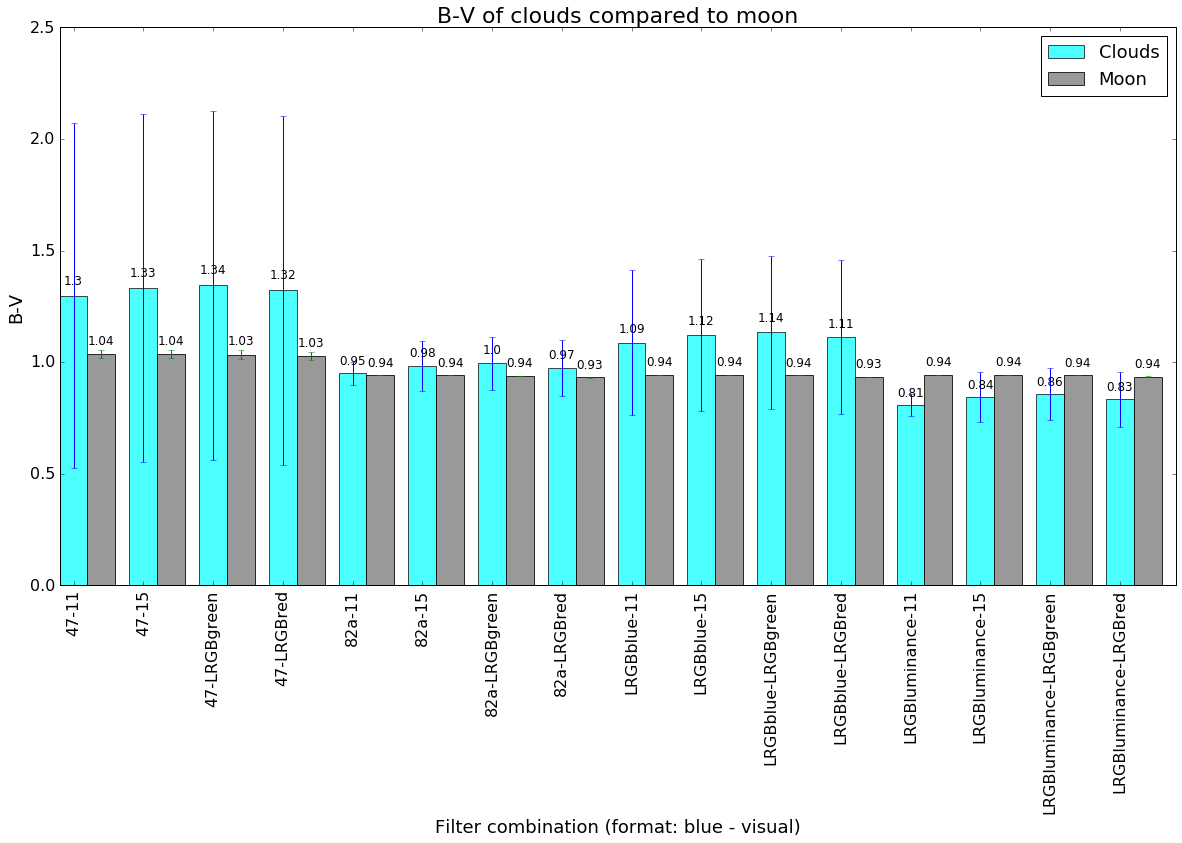

In [30]:
ind = np.arange(len(filtercombos))
width = 0.4       # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(ind, cloudbv, width, color='cyan', alpha=0.7, yerr=clouderr)
rects2 = ax.bar(ind + width, moonbv, width, color='gray', alpha = 0.8, yerr=moonerr)

# add some text for labels, title and axes ticks
ylbl = ax.set_ylabel('B-V', fontsize=18)
xlbl = ax.set_xlabel('Filter combination (format: blue - visual)', fontsize = 18)
titl2 = ax.set_title('B-V of clouds compared to moon', fontsize=22)
xt = ax.set_xticks(ind + width / 2)
xtl = ax.set_xticklabels(filtercombos, rotation="vertical")
lg = ax.legend((rects1[0], rects2[0]), ('Clouds', 'Moon'), fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
autolabel(rects1, cloudbv)
autolabel(rects2, moonbv)
plt.show()

16:26
    
Plots are looking good... now to make it into a script so it can be easily called in batch

17:00

took a break for half an hour to move to my desktop, now back at it! incorporating the plotting above into a script.

18:03

Script is now completed under the name `bv_plots.py`. Current todo list status:

TODO:

1. Continue with the manual photometry and calculating B-V
2. <s>Update plotting routine to incorporate error bars (need to propagate error a little more)</s>
3. <s>Update the official plotting script with the plotting routine in this notebook</s>
4. Make B-V plots etc for current data
5. Clean optics
6. Get more data
7. Fix instruction list
8. Write up
9. New poster

The last 3 are sort of meta stuff that isn't quite as important since I won't be presenting this anywhere.